In [1]:
import warnings
warnings.simplefilter("ignore",FutureWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import joblib
import math
import numpy as np
from itertools import product
from collections import Counter
import garpar as gp


In [3]:
mer = joblib.load("./until_2025-05-17.pklj")
mer= mer[6000:6252]
mer = mer.drop(columns=['BRIO', 'BRIO6','EDLH','EMDE','ESME','INAG','IRCP','PGR'])
mer = mer.fillna(method='ffill')
mer

,ALUA,BBAR,BMA,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,...,MORI,MTR,OEST,PATA,POLL,RICH,RIGO,SAMI,SEMI,TGLT
2024-05-07,870.0,4001.0,6900.05,1689.0,1205.0,115.25,1127.0,4890.0,1104.55,3902.5,...,178.0,1520.0,1064.0,969.0,460.0,933.0,918.5,822.0,102.25,30.70
2024-05-08,858.5,3850.0,6922.50,1660.0,1172.8,118.30,1101.0,4842.5,1081.00,3846.0,...,173.5,1460.0,1040.0,961.5,460.0,920.0,918.5,800.0,100.00,29.50
2024-05-09,848.0,3774.0,6880.00,1618.0,1162.0,121.50,1076.0,4799.0,1097.00,3760.0,...,166.0,1399.0,1015.0,956.5,460.0,913.0,880.0,799.5,96.90,28.25
2024-05-10,918.5,3721.0,6814.00,339.5,1120.0,119.95,1058.0,4785.0,1087.00,3738.0,...,175.0,1403.0,1048.0,1000.0,450.0,893.5,915.0,825.0,99.70,29.40
2024-05-13,885.0,3650.0,6605.00,325.0,1080.0,132.00,1025.9,4719.0,1027.00,3712.0,...,166.0,1417.0,1044.5,998.0,450.0,867.0,915.0,800.0,99.50,29.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-12,620.0,8290.0,10700.00,390.0,1430.0,143.50,1345.0,6490.0,1965.00,7290.0,...,272.0,2390.0,778.0,1450.0,305.0,1445.0,800.0,646.0,27.55,21.10
2025-05-13,659.0,8480.0,10775.00,392.5,1470.0,159.75,1355.0,6550.0,2075.00,7300.0,...,265.0,2360.0,802.0,1440.0,305.0,1405.0,800.0,662.0,27.00,21.35
2025-05-14,680.0,8510.0,10850.00,408.0,1520.0,174.00,1340.0,6600.0,2085.00,7220.0,...,270.0,2415.0,807.0,1480.0,300.0,1430.0,810.0,699.0,27.20,22.00
2025-05-15,683.0,8300.0,10775.00,406.0,1540.0,174.75,1345.0,6760.0,2080.00,7190.0,...,269.5,2485.0,815.0,1465.0,300.0,1500.0,790.0,667.0,27.25,22.70


In [4]:
describe= mer.describe().transpose()
describe["kurt"] = mer.kurt()
describe["skew"] = mer.skew()
describe


,count,mean,std,min,25%,50%,75%,max,kurt,skew
ALUA,252.0,878.321429,89.802827,620.0,827.7500,879.50,923.5000,1080.00,0.595866,-0.348879
BBAR,252.0,5987.440278,1860.649913,3355.0,4300.0000,5620.00,7830.0000,9510.00,-1.468140,0.275227
BMA,252.0,9216.689286,1893.386427,6000.0,7641.7500,9035.00,10681.2500,14150.00,-0.567455,0.432205
BYMA,252.0,393.218254,154.340158,274.0,322.0000,356.00,439.2500,1689.00,52.003687,6.595199
CEPU,252.0,1372.217262,207.080390,1010.0,1205.0000,1300.00,1540.0000,1920.00,-0.698988,0.551962
...,...,...,...,...,...,...,...,...,...,...
RICH,252.0,1321.404762,358.903488,867.0,965.1250,1400.00,1690.0000,1990.00,-1.716848,0.096133
RIGO,252.0,899.801587,74.877126,750.0,854.0000,899.50,956.2500,1060.00,-0.509116,0.195212
SAMI,252.0,974.736111,203.905427,570.0,835.7500,925.50,1146.2500,1435.00,-0.667390,0.304025
SEMI,252.0,94.361706,52.983319,23.9,32.3375,117.25,136.8125,186.25,-1.607875,-0.213909


In [5]:
rend = mer.diff(periods=1)/mer
rend = rend[1:252]
rend9m= rend[69:252]
rend6m= rend[132:252]
rend3m= rend[194:252]


In [6]:
# definimos los sectores 
come = ["AUSO", "BOLT", "DYCA","GCLA", "IRSA", "OEST", "PATA", "POLL","TECO2","CVH", "GAMI", "CTIO", "OEST", "TGLT"] 
# en come "IRCP" cotizó solo 45 días sacada del análisis
moa = ["CELU", "GRIM", "HAVA", "LEDE", "MOLA", "MOLI", "MORI", "SAMI", "SEMI","INTR", "RICH"] 
moi = ["AGRO", "ALUA",  "FERR", "LONG", "RIGO", "HARG", "FIPL", "LOMA","MIRG","TXAR", "DOME"] 
# "ROSE" ,"CAPU" no cortizaron en el periodo
agro = ["CADO", "GARO", "INVJ","CRES"] #"ESME" cotizó 55 días no alcanza
ene = ["CARC","CEPU", "CGPA2", "DGCU2", "EDN","GBAN", "METR", "TGNO4", "TGSU2", "YPFD", "PAMP","TRAN","COME", 
       "CAPX", "CECO2", "MTR"]  
fin = ["BHIP", "BPAT",  "BYMA", "GGAL", "SUPV", "BBAR", "VALO","BMA"] # "BRIO","BRIO6" no tuvieron suficientes cotizacionecs

In [7]:
#  BONDAD AJUSTE para 12 meses levy stable 
y24scome = rend[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = stats.levy_stable.fit(y24scome)
ktestcom = stats.ks_1samp(x=y24scome, cdf=stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))

y24smoa = rend[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = stats.levy_stable.fit(y24smoa)
ktestmoa = stats.ks_1samp(x=y24smoa, cdf=stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))

y24smoi = rend[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = stats.levy_stable.fit(y24smoi)
ktestmoi = stats.ks_1samp(x=y24smoi, cdf=stats.levy_stable.cdf, args=(alphamoi, betamoi, locmoi, scalemoi))

y24sagro = rend[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = stats.levy_stable.fit(y24sagro)
ktestagro = stats.ks_1samp(x=y24sagro, cdf= stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))

y24sene = rend[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = stats.levy_stable.fit(y24sene)
ktestene= stats.ks_1samp(x=y24sene, cdf=stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))

y24sfin = rend[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = stats.levy_stable.fit(y24sfin)
ktestfin=stats.ks_1samp(x=y24sfin, cdf=stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))

y24s = rend.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = stats.levy_stable.fit(y24s)
ktestt= stats.ks_1samp(x=y24s, cdf=stats.levy_stable.cdf, args=(alphat, betat, loct, scalet))


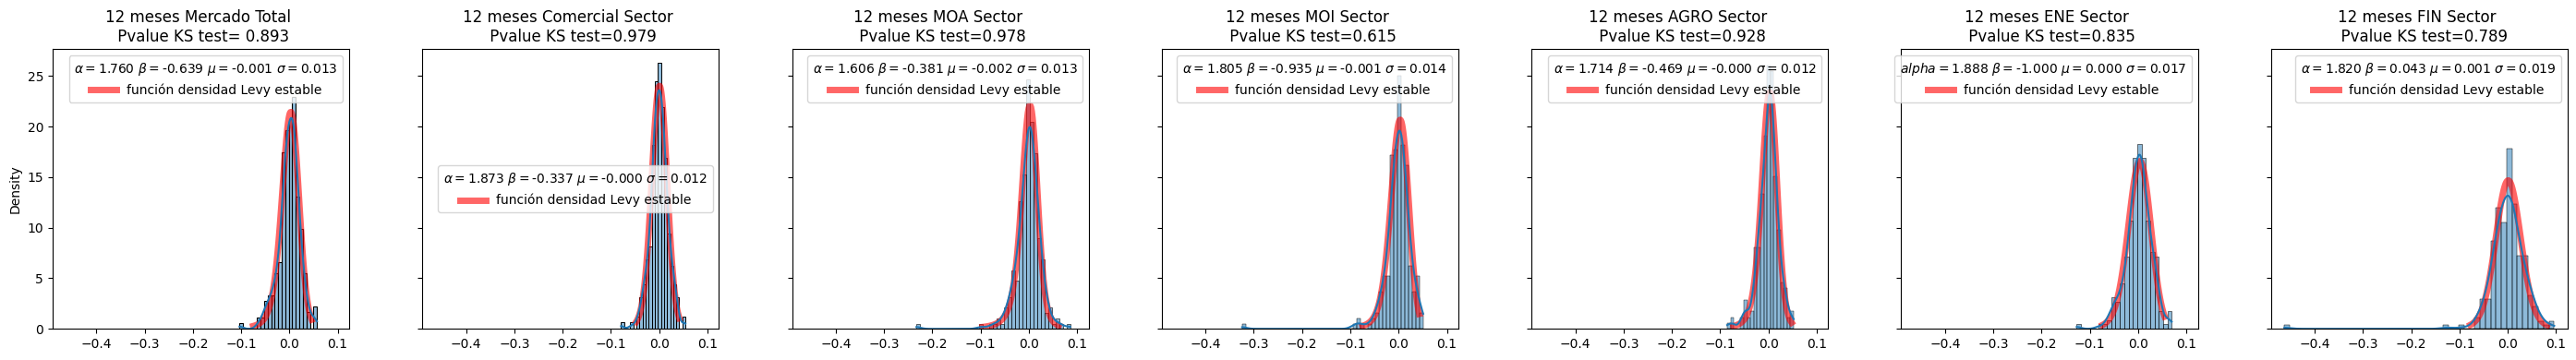

In [8]:
# Histograma para 12 meses levy stable 

fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(28, 4)
#todo
alpha, beta, loc, scale = alphat, betat, loct, scalet
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[0],data=y24s,stat = "density",kde=True)
ax[0].set_title(f"12 meses Mercado Total \n Pvalue KS test= {ktestt.pvalue:.3f}")
ax[0].legend(title=fr"$\alpha=${alphat:.3f} $\beta=${betat:.3f} $\mu=${loct:.3f} $\sigma=${scalet:.3f}", title_fontsize = "10")

#come
alpha, beta, loc, scale = alpha_come, beta_come, loc_come, scale_come 
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[1],data=y24scome, stat = "density",kde=True)
ax[1].set_title(f"12 meses Comercial Sector \n Pvalue KS test={ktestcom.pvalue:.3f}")
ax[1].legend(title=fr"$\alpha=${alpha_come:.3f} $\beta=${beta_come:.3f} $\mu=${loc_come:.3f} $\sigma=${scale_come:.3f}", title_fontsize = "10")

#moa
alpha, beta, loc, scale = alphamoa, betamoa, locmoa, scalemoa
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[2].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[2],data=y24smoa, stat = "density",kde=True)
ax[2].set_title(f"12 meses MOA Sector \n Pvalue KS test={ktestmoa.pvalue:.3f}")
ax[2].legend(title=fr"$\alpha=${alphamoa:.3f} $\beta=${betamoa:.3f} $\mu=${locmoa:.3f} $\sigma=${scalemoa:.3f}", title_fontsize = "10")

#moi
alpha, beta, loc, scale = alphamoi, betamoi, locmoi, scalemoi
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[3].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[3],data=y24smoi, stat = "density",kde=True)
ax[3].set_title(f"12 meses MOI Sector \n Pvalue KS test={ktestmoi.pvalue:.3f}" )
ax[3].legend(title=fr"$\alpha=${alphamoi:.3f} $\beta=${betamoi:.3f} $\mu=${locmoi:.3f} $\sigma=${scalemoi:.3f}", title_fontsize = "10")

#agro
alpha, beta, loc, scale = alphaagro, betaagro, locagro, scaleagro
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[4].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[4],data=y24sagro, stat = "density",kde=True)
ax[4].set_title(f"12 meses AGRO Sector \n Pvalue KS test={ktestagro.pvalue:.3f}")
ax[4].legend(title=fr"$\alpha=${alphaagro:.3f} $\beta=${betaagro:.3f} $\mu=${locagro:.3f} $\sigma=${scaleagro:.3f}", title_fontsize = "10")

#ene
alpha, beta, loc, scale = alphaene, betaene, locene, scaleene
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[5].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[5],data=y24sene, stat = "density",kde=True)
ax[5].set_title(f"12 meses ENE Sector \n Pvalue KS test={ktestene.pvalue:.3f}")
ax[5].legend(title=fr"$alpha=${alphaene:.3f} $\beta=${betaene:.3f} $\mu=${locene:.3f} $\sigma=${scaleene:.3f}", title_fontsize = "10")

#FIN
alpha, beta, loc, scale = alphafin, betafin, locfin, scalefin
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[6].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[6],data=y24sfin, stat = "density",kde=True)
ax[6].set_title(f"12 meses FIN Sector \n  Pvalue KS test={ktestfin.pvalue:.3f}")
ax[6].legend(title=fr"$\alpha=${alphafin:.3f} $\beta=${betafin:.3f} $\mu=${locfin:.3f} $\sigma=${scalefin:.3f}", title_fontsize = "10")



fig.tight_layout()


# blue line is empirical data and red line is teorical data of the goodness fit

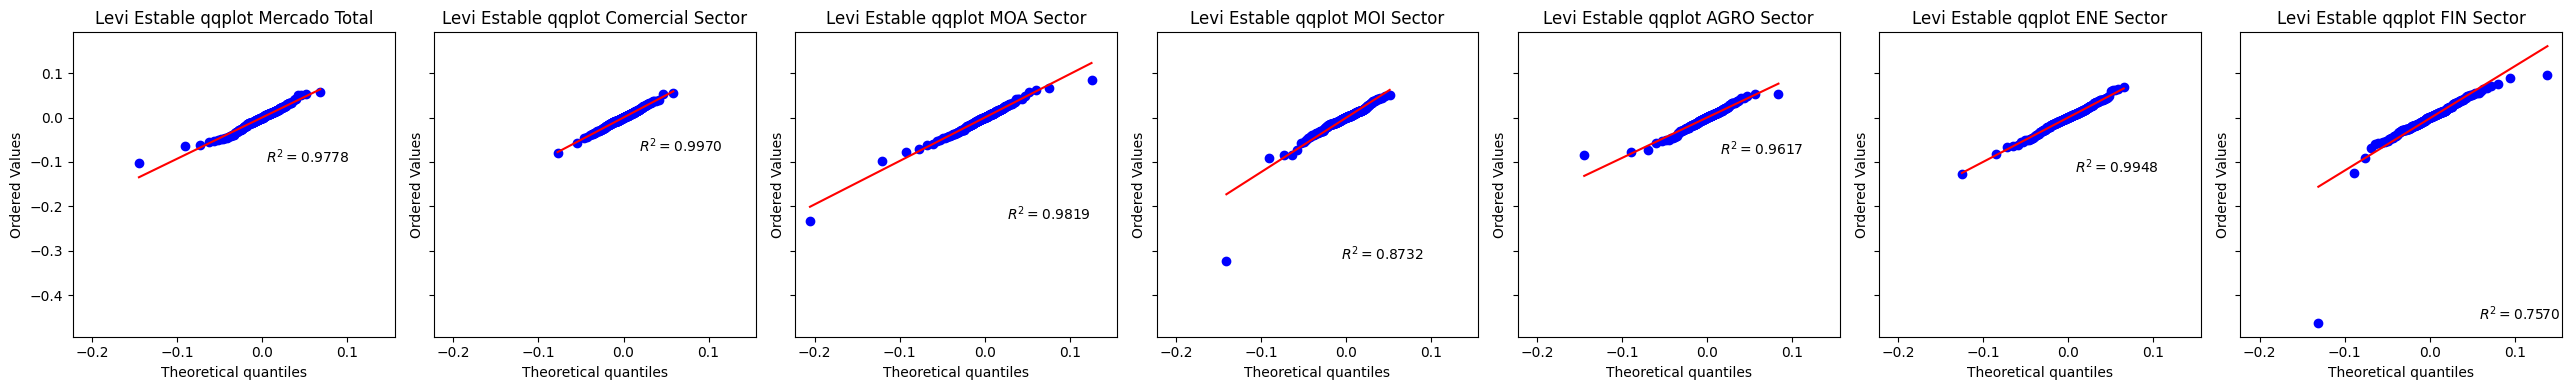

In [9]:
# QQPLOT LEVI STABLE PARA 12 MESES
fig, axs = plt.subplots(1, 7, sharey=True, sharex=True, figsize=(10, 5))
fig.set_size_inches(26,4)


#todo
alpha, beta, loc, scale = alphat, betat, loct, scalet
stats.probplot(y24s,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[0])
axs[0].set_title(f"Levi Estable qqplot Mercado Total")


#come
alpha, beta, loc, scale = alpha_come, beta_come, loc_come, scale_come 
stats.probplot(y24scome,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[1])
axs[1].set_title(f"Levi Estable qqplot Comercial Sector")


#moa
alpha, beta, loc, scale = alphamoa, betamoa, locmoa, scalemoa
stats.probplot(y24smoa,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[2])
axs[2].set_title(f"Levi Estable qqplot MOA Sector")

#moi
alpha, beta, loc, scale = alphamoi, betamoi, locmoi, scalemoi
stats.probplot(y24smoi,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[3])
axs[3].set_title(f"Levi Estable qqplot MOI Sector" )

#agro
alpha, beta, loc, scale = alphaagro, betaagro, locagro, scaleagro
stats.probplot(y24sagro,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[4])
axs[4].set_title(f"Levi Estable qqplot AGRO Sector")

#ene
alpha, beta, loc, scale = alphaene, betaene, locene, scaleene
stats.probplot(y24sene,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[5])
axs[5].set_title(f"Levi Estable qqplot ENE Sector")


#FIN
alpha, beta, loc, scale = alphafin, betafin, locfin, scalefin
stats.probplot(y24sfin,dist='levy_stable', sparams=(alpha, beta, loc, scale),rvalue=True, plot=axs[6])
axs[6].set_title(f"Levi Estable qqplot FIN Sector")



plt.tight_layout()

plt.show()

In [10]:
#  BONDAD AJUSTE para 9 meses levy stable 

y24scome9 = rend9m[come].mean(axis = 1, skipna = True) 
alpha_come9, beta_come9, loc_come9, scale_come9 = stats.levy_stable.fit(y24scome9)
ktestcom9 = stats.ks_1samp(x=y24scome9, cdf=stats.levy_stable.cdf, args=(alpha_come9, beta_come9, loc_come9, scale_come9 ))

y24smoa9 = rend9m[moa].mean(axis = 1, skipna = True) 
alphamoa9, betamoa9, locmoa9, scalemoa9 = stats.levy_stable.fit(y24smoa9)
ktestmoa9 = stats.ks_1samp(x=y24smoa9, cdf=stats.levy_stable.cdf, args=(alphamoa9, betamoa9, locmoa9, scalemoa9))

y24smoi9 = rend9m[moi].mean(axis = 1, skipna = True) 
alphamoi9, betamoi9, locmoi9, scalemoi9 = stats.levy_stable.fit(y24smoi9)
ktestmoi9 = stats.ks_1samp(x=y24smoi9, cdf=stats.levy_stable.cdf, args=(alphamoi9, betamoi9, locmoi9, scalemoi9))

y24sagro9 = rend9m[agro].mean(axis = 1, skipna = True) 
alphaagro9, betaagro9, locagro9, scaleagro9 = stats.levy_stable.fit(y24sagro9)
ktestagro9 = stats.ks_1samp(x=y24sagro9, cdf= stats.levy_stable.cdf, args=(alphaagro9, betaagro9, locagro9, scaleagro9))

y24sene9 = rend9m[ene].mean(axis = 1, skipna = True) 
alphaene9, betaene9, locene9, scaleene9 = stats.levy_stable.fit(y24sene9)
ktestene9= stats.ks_1samp(x=y24sene9, cdf=stats.levy_stable.cdf, args=(alphaene9, betaene9, locene9, scaleene9))

y24sfin9 = rend9m[fin].mean(axis = 1, skipna = True) 
alphafin9, betafin9, locfin9, scalefin9 = stats.levy_stable.fit(y24sfin9)
ktestfin9=stats.ks_1samp(x=y24sfin9, cdf=stats.levy_stable.cdf, args=(alphafin9, betafin9, locfin9, scalefin9))

y24s9 = rend9m.mean(axis = 1, skipna = True) 
alphat9, betat9, loct9, scalet9 = stats.levy_stable.fit(y24s9)
ktestt9= stats.ks_1samp(x=y24s9, cdf=stats.levy_stable.cdf, args=(alphat9, betat9, loct9, scalet9))

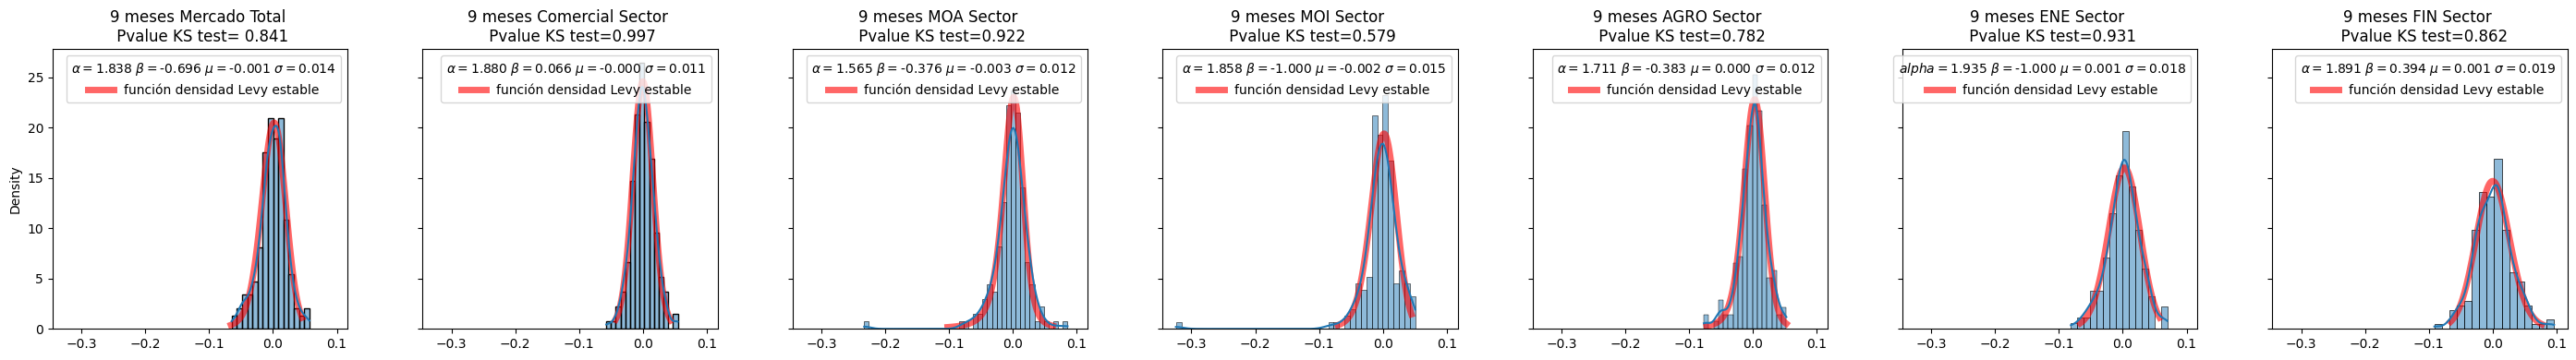

In [11]:
# Histograma para 9 meses levy stable 

fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(28, 4)
#todo
alpha, beta, loc, scale = alphat9, betat9, loct9, scalet9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[0],data=y24s9,stat = "density",kde=True)
ax[0].set_title(f"9 meses Mercado Total \n Pvalue KS test= {ktestt9.pvalue:.3f}")
ax[0].legend(title=fr"$\alpha=${alphat9:.3f} $\beta=${betat9:.3f} $\mu=${loct9:.3f} $\sigma=${scalet9:.3f}", title_fontsize = "10")

#come
alpha, beta, loc, scale = alpha_come9, beta_come9, loc_come9, scale_come9 
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[1],data=y24scome9, stat = "density",kde=True)
ax[1].set_title(f"9 meses Comercial Sector \n Pvalue KS test={ktestcom9.pvalue:.3f}")
ax[1].legend(title=fr"$\alpha=${alpha_come9:.3f} $\beta=${beta_come9:.3f} $\mu=${loc_come9:.3f} $\sigma=${scale_come9:.3f}", title_fontsize = "10")

#moa
alpha, beta, loc, scale = alphamoa9, betamoa9, locmoa9, scalemoa9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[2].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[2],data=y24smoa9, stat = "density",kde=True)
ax[2].set_title(f"9 meses MOA Sector \n Pvalue KS test={ktestmoa9.pvalue:.3f}")
ax[2].legend(title=fr"$\alpha=${alphamoa9:.3f} $\beta=${betamoa9:.3f} $\mu=${locmoa9:.3f} $\sigma=${scalemoa9:.3f}", title_fontsize = "10")

#moi
alpha, beta, loc, scale = alphamoi9, betamoi9, locmoi9, scalemoi9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[3].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[3],data=y24smoi9, stat = "density",kde=True)
ax[3].set_title(f"9 meses MOI Sector \n Pvalue KS test={ktestmoi9.pvalue:.3f}" )
ax[3].legend(title=fr"$\alpha=${alphamoi9:.3f} $\beta=${betamoi9:.3f} $\mu=${locmoi9:.3f} $\sigma=${scalemoi9:.3f}", title_fontsize = "10")

#agro
alpha, beta, loc, scale = alphaagro9, betaagro9, locagro9, scaleagro9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[4].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[4],data=y24sagro9, stat = "density",kde=True)
ax[4].set_title(f"9 meses AGRO Sector \n Pvalue KS test={ktestagro9.pvalue:.3f}")
ax[4].legend(title=fr"$\alpha=${alphaagro9:.3f} $\beta=${betaagro9:.3f} $\mu=${locagro9:.3f} $\sigma=${scaleagro9:.3f}", title_fontsize = "10")

#ene
alpha, beta, loc, scale = alphaene9, betaene9, locene9, scaleene9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[5].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[5],data=y24sene9, stat = "density",kde=True)
ax[5].set_title(f"9 meses ENE Sector \n Pvalue KS test={ktestene9.pvalue:.3f}")
ax[5].legend(title=fr"$alpha=${alphaene9:.3f} $\beta=${betaene9:.3f} $\mu=${locene9:.3f} $\sigma=${scaleene9:.3f}", title_fontsize = "10")

#FIN
alpha, beta, loc, scale = alphafin9, betafin9, locfin9, scalefin9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[6].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[6],data=y24sfin9, stat = "density",kde=True)
ax[6].set_title(f"9 meses FIN Sector \n  Pvalue KS test={ktestfin9.pvalue:.3f}")
ax[6].legend(title=fr"$\alpha=${alphafin9:.3f} $\beta=${betafin9:.3f} $\mu=${locfin9:.3f} $\sigma=${scalefin9:.3f}", title_fontsize = "10")



fig.tight_layout()



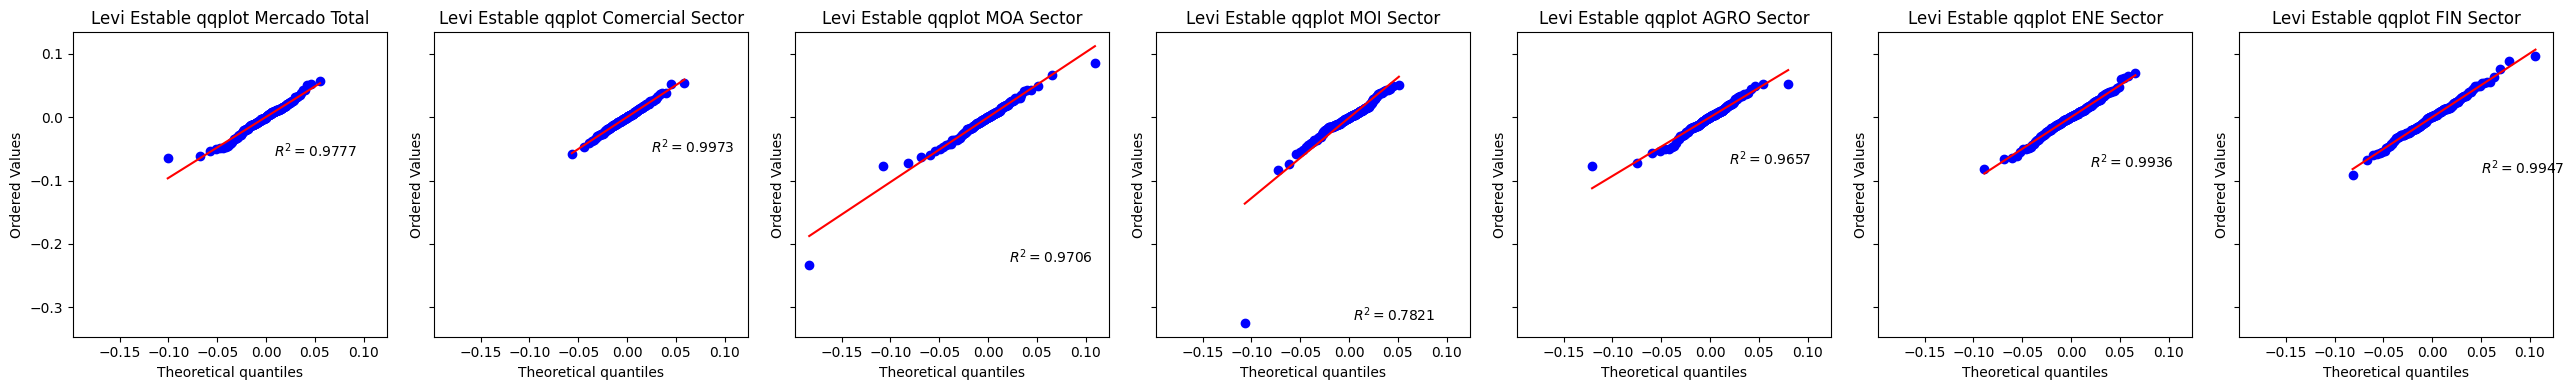

In [12]:
#QQPLOT LEVI PARA 9 MESES 
fig, axs = plt.subplots(1, 7, sharey=True, sharex=True, figsize=(10, 5))
fig.set_size_inches(26,4)


#todo
alpha, beta, loc, scale = alphat9, betat9, loct9, scalet9
stats.probplot(y24s9,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[0])
axs[0].set_title(f"Levi Estable qqplot Mercado Total")


#come
alpha, beta, loc, scale = alpha_come9, beta_come9, loc_come9, scale_come9 
stats.probplot(y24scome9,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[1])
axs[1].set_title(f"Levi Estable qqplot Comercial Sector")


#moa
alpha, beta, loc, scale = alphamoa9, betamoa9, locmoa9, scalemoa9
stats.probplot(y24smoa9,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[2])
axs[2].set_title(f"Levi Estable qqplot MOA Sector")

#moi
alpha, beta, loc, scale = alphamoi9, betamoi9, locmoi9, scalemoi9
stats.probplot(y24smoi9,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[3])
axs[3].set_title(f"Levi Estable qqplot MOI Sector" )

#agro
alpha, beta, loc, scale = alphaagro9, betaagro9, locagro9, scaleagro9
stats.probplot(y24sagro9,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[4])
axs[4].set_title(f"Levi Estable qqplot AGRO Sector")

#ene
alpha, beta, loc, scale = alphaene9, betaene9, locene9, scaleene9
stats.probplot(y24sene9,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[5])
axs[5].set_title(f"Levi Estable qqplot ENE Sector")


#FIN
alpha, beta, loc, scale = alphafin9, betafin9, locfin9, scalefin9
stats.probplot(y24sfin9,dist='levy_stable', sparams=(alpha, beta, loc, scale),rvalue=True, plot=axs[6])
axs[6].set_title(f"Levi Estable qqplot FIN Sector")



plt.tight_layout()

plt.show()

In [13]:
#  BONDAD AJUSTE para 6 meses levy stable 

y24scome6 = rend6m[come].mean(axis = 1, skipna = True) 
alpha_come6, beta_come6, loc_come6, scale_come6 = stats.levy_stable.fit(y24scome6)
ktestcom6 = stats.ks_1samp(x=y24scome6, cdf=stats.levy_stable.cdf, args=(alpha_come6, beta_come6, loc_come6, scale_come6 ))

y24smoa6 = rend6m[moa].mean(axis = 1, skipna = True) 
alphamoa6, betamoa6, locmoa6, scalemoa6 = stats.levy_stable.fit(y24smoa6)
ktestmoa6 = stats.ks_1samp(x=y24smoa6, cdf=stats.levy_stable.cdf, args=(alphamoa6, betamoa6, locmoa6, scalemoa6))

y24smoi6 = rend6m[moi].mean(axis = 1, skipna = True) 
alphamoi6, betamoi6, locmoi6, scalemoi6 = stats.levy_stable.fit(y24smoi6)
ktestmoi6 = stats.ks_1samp(x=y24smoi6, cdf=stats.levy_stable.cdf, args=(alphamoi6, betamoi6, locmoi6, scalemoi6))

y24sagro6 = rend6m[agro].mean(axis = 1, skipna = True) 
alphaagro6, betaagro6, locagro6, scaleagro6 = stats.levy_stable.fit(y24sagro6)
ktestagro6 = stats.ks_1samp(x=y24sagro6, cdf= stats.levy_stable.cdf, args=(alphaagro6, betaagro6, locagro6, scaleagro6))

y24sene6 = rend6m[ene].mean(axis = 1, skipna = True) 
alphaene6, betaene6, locene6, scaleene6 = stats.levy_stable.fit(y24sene6)
ktestene6= stats.ks_1samp(x=y24sene6, cdf=stats.levy_stable.cdf, args=(alphaene6, betaene6, locene6, scaleene6))

y24sfin6 = rend6m[fin].mean(axis = 1, skipna = True) 
alphafin6, betafin6, locfin6, scalefin6 = stats.levy_stable.fit(y24sfin6)
ktestfin6=stats.ks_1samp(x=y24sfin6, cdf=stats.levy_stable.cdf, args=(alphafin6, betafin6, locfin6, scalefin6 ))

y24s6 = rend6m.mean(axis = 1, skipna = True) 
alphat6, betat6, loct6, scalet6 = stats.levy_stable.fit(y24s6)
ktestt6= stats.ks_1samp(x=y24s6, cdf=stats.levy_stable.cdf, args=(alphat6, betat6, loct6, scalet6 ))


 


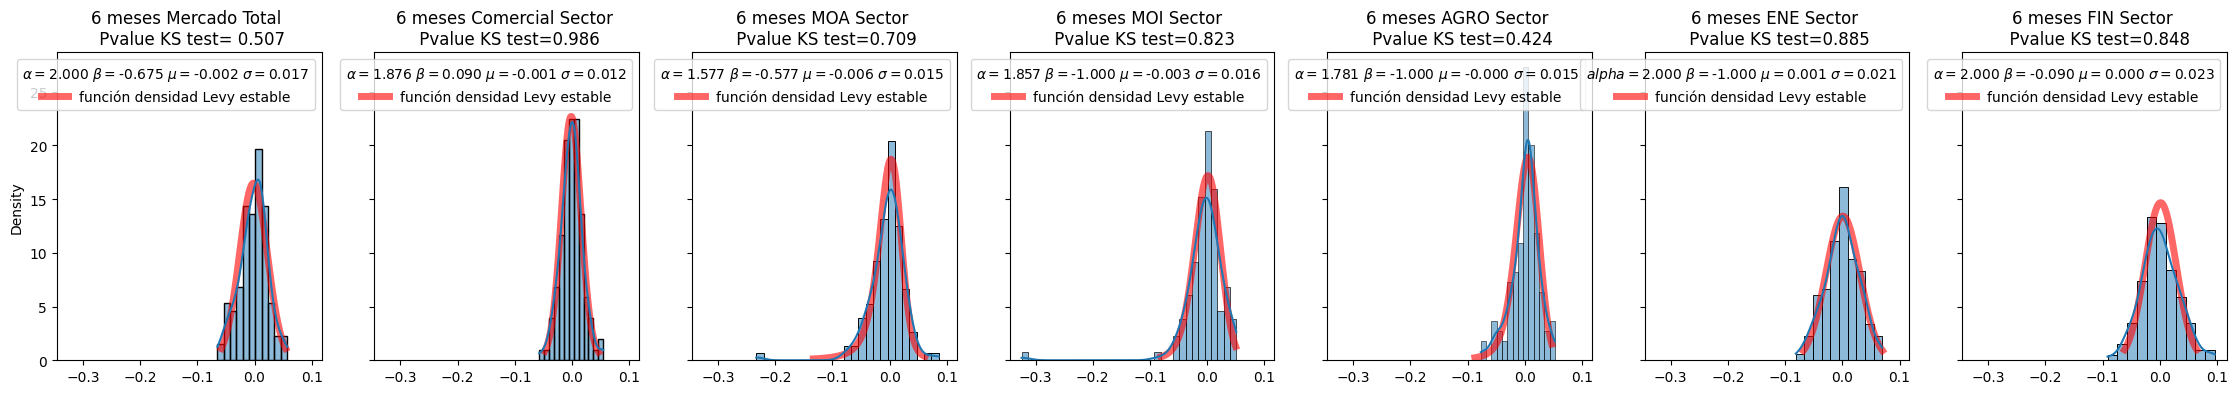

In [14]:
# Histograma para 6 meses levy stable 

fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(28, 4)
#todo
alpha, beta, loc, scale = alphat6, betat6, loct6, scalet6
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[0],data=y24s6,stat = "density",kde=True)
ax[0].set_title(f"6 meses Mercado Total \n Pvalue KS test= {ktestt6.pvalue:.3f}")
ax[0].legend(title=fr"$\alpha=${alphat6:.3f} $\beta=${betat6:.3f} $\mu=${loct6:.3f} $\sigma=${scalet6:.3f}", title_fontsize = "10")

#come
alpha, beta, loc, scale = alpha_come6, beta_come6, loc_come6, scale_come6 
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[1],data=y24scome6, stat = "density",kde=True)
ax[1].set_title(f"6 meses Comercial Sector \n Pvalue KS test={ktestcom6.pvalue:.3f}")
ax[1].legend(title=fr"$\alpha=${alpha_come6:.3f} $\beta=${beta_come6:.3f} $\mu=${loc_come6:.3f} $\sigma=${scale_come6:.3f}", title_fontsize = "10")

#moa
alpha, beta, loc, scale = alphamoa6, betamoa6, locmoa6, scalemoa6
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[2].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[2],data=y24smoa6, stat = "density",kde=True)
ax[2].set_title(f"6 meses MOA Sector \n Pvalue KS test={ktestmoa6.pvalue:.3f}")
ax[2].legend(title=fr"$\alpha=${alphamoa6:.3f} $\beta=${betamoa6:.3f} $\mu=${locmoa6:.3f} $\sigma=${scalemoa6:.3f}", title_fontsize = "10")

#moi
alpha, beta, loc, scale = alphamoi6, betamoi6, locmoi6, scalemoi6
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[3].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[3],data=y24smoi6, stat = "density",kde=True)
ax[3].set_title(f"6 meses MOI Sector \n Pvalue KS test={ktestmoi6.pvalue:.3f}" )
ax[3].legend(title=fr"$\alpha=${alphamoi6:.3f} $\beta=${betamoi6:.3f} $\mu=${locmoi6:.3f} $\sigma=${scalemoi6:.3f}", title_fontsize = "10")

#agro
alpha, beta, loc, scale = alphaagro6, betaagro6, locagro6, scaleagro6
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[4].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[4],data=y24sagro6, stat = "density",kde=True)
ax[4].set_title(f"6 meses AGRO Sector \n Pvalue KS test={ktestagro6.pvalue:.3f}")
ax[4].legend(title=fr"$\alpha=${alphaagro6:.3f} $\beta=${betaagro6:.3f} $\mu=${locagro6:.3f} $\sigma=${scaleagro6:.3f}", title_fontsize = "10")

#ene
alpha, beta, loc, scale = alphaene6, betaene6, locene6, scaleene6
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[5].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[5],data=y24sene6, stat = "density",kde=True)
ax[5].set_title(f"6 meses ENE Sector \n Pvalue KS test={ktestene6.pvalue:.3f}")
ax[5].legend(title=fr"$alpha=${alphaene6:.3f} $\beta=${betaene6:.3f} $\mu=${locene6:.3f} $\sigma=${scaleene6:.3f}", title_fontsize = "10")

#FIN
alpha, beta, loc, scale = alphafin6, betafin9, locfin9, scalefin9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[6].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[6],data=y24sfin6, stat = "density",kde=True)
ax[6].set_title(f"6 meses FIN Sector \n  Pvalue KS test={ktestfin6.pvalue:.3f}")
ax[6].legend(title=fr"$\alpha=${alphafin6:.3f} $\beta=${betafin6:.3f} $\mu=${locfin6:.3f} $\sigma=${scalefin6:.3f}", title_fontsize = "10")




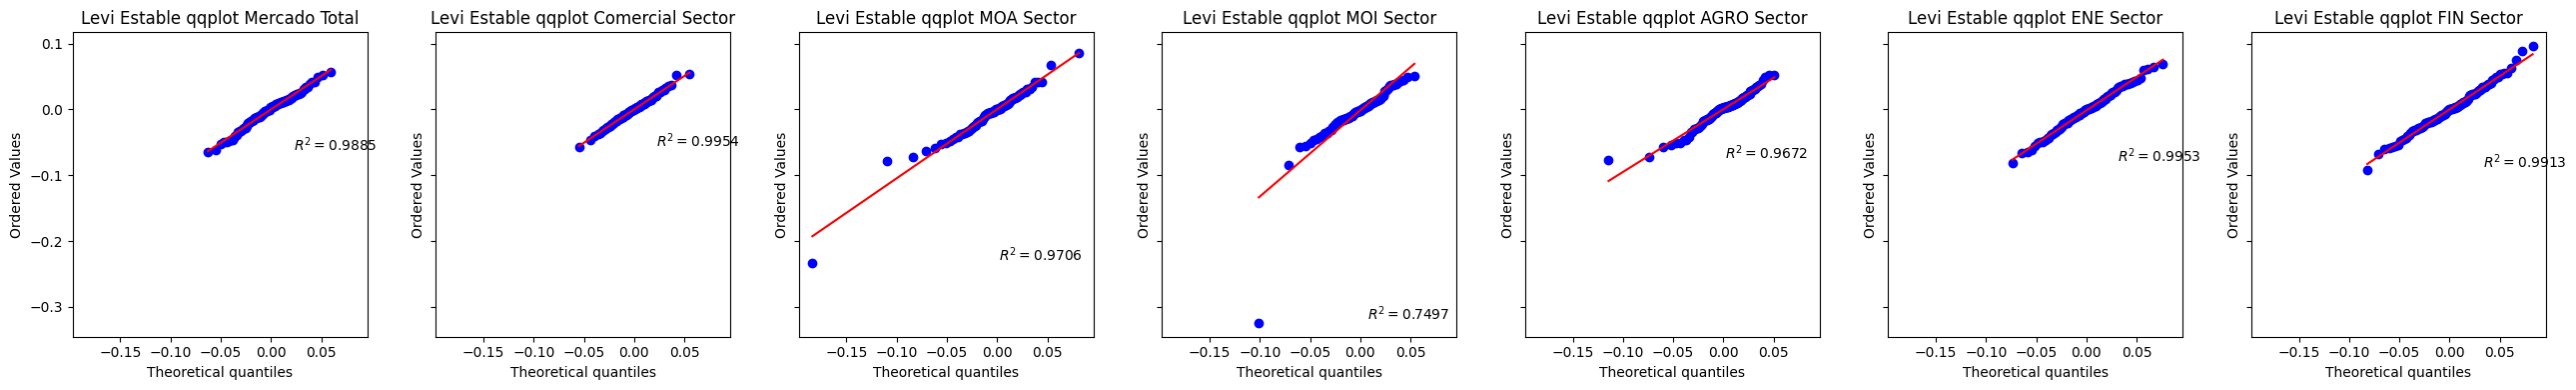

In [15]:
#QQPLOT LEVI PARA 6 MESES 
fig, axs = plt.subplots(1, 7, sharey=True, sharex=True, figsize=(10, 5))
fig.set_size_inches(26,4)


#todo
alpha, beta, loc, scale = alphat6, betat6, loct6, scalet6
stats.probplot(y24s6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[0])
axs[0].set_title(f"Levi Estable qqplot Mercado Total")


#come
alpha, beta, loc, scale = alpha_come6, beta_come6, loc_come6, scale_come6 
stats.probplot(y24scome6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[1])
axs[1].set_title(f"Levi Estable qqplot Comercial Sector")


#moa
alpha, beta, loc, scale = alphamoa6, betamoa6, locmoa6, scalemoa6
stats.probplot(y24smoa6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[2])
axs[2].set_title(f"Levi Estable qqplot MOA Sector")

#moi
alpha, beta, loc, scale = alphamoi6, betamoi6, locmoi6, scalemoi6
stats.probplot(y24smoi6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[3])
axs[3].set_title(f"Levi Estable qqplot MOI Sector" )

#agro
alpha, beta, loc, scale = alphaagro6, betaagro6, locagro6, scaleagro6
stats.probplot(y24sagro6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[4])
axs[4].set_title(f"Levi Estable qqplot AGRO Sector")

#ene
alpha, beta, loc, scale = alphaene6, betaene6, locene6, scaleene6
stats.probplot(y24sene6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[5])
axs[5].set_title(f"Levi Estable qqplot ENE Sector")


#FIN
alpha, beta, loc, scale = alphafin6, betafin6, locfin6, scalefin6
stats.probplot(y24sfin6,dist='levy_stable', sparams=(alpha, beta, loc, scale),rvalue=True, plot=axs[6])
axs[6].set_title(f"Levi Estable qqplot FIN Sector")



plt.tight_layout()

plt.show()

In [16]:
#  BONDAD AJUSTE para 3 meses levy stable 

y24scome3 = rend3m[come].mean(axis = 1, skipna = True) 
alpha_come3, beta_come3, loc_come3, scale_come3 = stats.levy_stable.fit(y24scome3)
ktestcom3 = stats.ks_1samp(x=y24scome3, cdf=stats.levy_stable.cdf, args=(alpha_come3, beta_come3, loc_come3, scale_come3 ))

y24smoa3 = rend3m[moa].mean(axis = 1, skipna = True) 
alphamoa3, betamoa3, locmoa3, scalemoa3 = stats.levy_stable.fit(y24smoa3)
ktestmoa3 = stats.ks_1samp(x=y24smoa3, cdf=stats.levy_stable.cdf, args=(alphamoa3, betamoa3, locmoa3, scalemoa3))

y24smoi3 = rend3m[moi].mean(axis = 1, skipna = True) 
alphamoi3, betamoi3, locmoi3, scalemoi3 = stats.levy_stable.fit(y24smoi3)
ktestmoi3 = stats.ks_1samp(x=y24smoi3, cdf=stats.levy_stable.cdf, args=(alphamoi3, betamoi3, locmoi3, scalemoi3))

y24sagro3 = rend3m[agro].mean(axis = 1, skipna = True) 
alphaagro3, betaagro3, locagro3, scaleagro3 = stats.levy_stable.fit(y24sagro3)
ktestagro3 = stats.ks_1samp(x=y24sagro3, cdf= stats.levy_stable.cdf, args=(alphaagro3, betaagro3, locagro3, scaleagro3 ))

y24sene3 = rend3m[ene].mean(axis = 1, skipna = True) 
alphaene3, betaene3, locene3, scaleene3 = stats.levy_stable.fit(y24sene3)
ktestene3= stats.ks_1samp(x=y24sene3, cdf=stats.levy_stable.cdf, args=(alphaene3, betaene3, locene3, scaleene3))

y24sfin3 = rend3m[fin].mean(axis = 1, skipna = True) 
alphafin3, betafin3, locfin3, scalefin3 = stats.levy_stable.fit(y24sfin3)
ktestfin3=stats.ks_1samp(x=y24sfin3, cdf=stats.levy_stable.cdf, args=(alphafin3, betafin3, locfin3, scalefin3 ))

y24s3 = rend3m.mean(axis = 1, skipna = True) 
alphat3, betat3, loct3, scalet3 = stats.levy_stable.fit(y24s3)
ktestt3= stats.ks_1samp(x=y24s3, cdf=stats.levy_stable.cdf, args=(alphat3, betat3, loct3, scalet3))


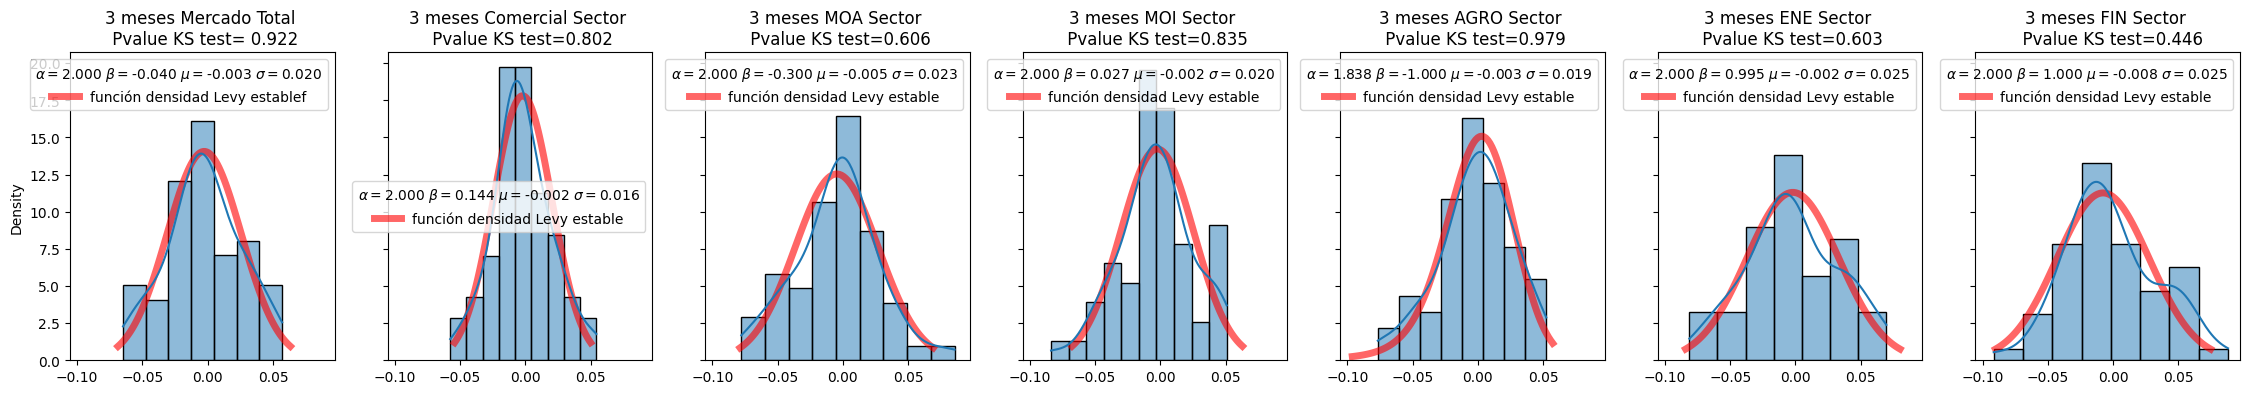

In [17]:
# Histograma para 3 meses levy stable 

fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(28, 4)
#todo
alpha, beta, loc, scale = alphat3, betat3, loct3, scalet3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy establef')
sns.histplot(ax=ax[0],data=y24s3,stat = "density",kde=True)
ax[0].set_title(f"3 meses Mercado Total \n Pvalue KS test= {ktestt3.pvalue:.3f}")
ax[0].legend(title=fr"$\alpha=${alphat3:.3f} $\beta=${betat3:.3f} $\mu=${loct3:.3f} $\sigma=${scalet3:.3f}", title_fontsize = "10")

#come
alpha, beta, loc, scale = alpha_come3, beta_come3, loc_come3, scale_come3 
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[1],data=y24scome3, stat = "density",kde=True)
ax[1].set_title(f"3 meses Comercial Sector \n Pvalue KS test={ktestcom3.pvalue:.3f}")
ax[1].legend(title=fr"$\alpha=${alpha_come3:.3f} $\beta=${beta_come3:.3f} $\mu=${loc_come3:.3f} $\sigma=${scale_come3:.3f}", title_fontsize = "10")

#moa
alpha, beta, loc, scale = alphamoa3, betamoa3, locmoa3, scalemoa3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[2].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[2],data=y24smoa3, stat = "density",kde=True)
ax[2].set_title(f"3 meses MOA Sector \n Pvalue KS test={ktestmoa3.pvalue:.3f}")
ax[2].legend(title=fr"$\alpha=${alphamoa3:.3f} $\beta=${betamoa3:.3f} $\mu=${locmoa3:.3f} $\sigma=${scalemoa3:.3f}", title_fontsize = "10")

#moi
alpha, beta, loc, scale = alphamoi3, betamoi3, locmoi3, scalemoi3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[3].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[3],data=y24smoi3, stat = "density",kde=True)
ax[3].set_title(f"3 meses MOI Sector \n Pvalue KS test={ktestmoi3.pvalue:.3f}" )
ax[3].legend(title=fr"$\alpha=${alphamoi3:.3f} $\beta=${betamoi3:.3f} $\mu=${locmoi3:.3f} $\sigma=${scalemoi3:.3f}", title_fontsize = "10")

#agro
alpha, beta, loc, scale = alphaagro3, betaagro3, locagro3, scaleagro3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[4].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[4],data=y24sagro3, stat = "density",kde=True)
ax[4].set_title(f"3 meses AGRO Sector \n Pvalue KS test={ktestagro3.pvalue:.3f}")
ax[4].legend(title=fr"$\alpha=${alphaagro3:.3f} $\beta=${betaagro3:.3f} $\mu=${locagro3:.3f} $\sigma=${scaleagro3:.3f}", title_fontsize = "10")

#ene
alpha, beta, loc, scale = alphaene3, betaene3, locene3, scaleene3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[5].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[5],data=y24sene3, stat = "density",kde=True)
ax[5].set_title(f"3 meses ENE Sector \n Pvalue KS test={ktestene3.pvalue:.3f}")
ax[5].legend(title=fr"$\alpha=${alphaene3:.3f} $\beta=${betaene3:.3f} $\mu=${locene3:.3f} $\sigma=${scaleene3:.3f}", title_fontsize = "10")

#FIN
alpha, beta, loc, scale = alphafin3, betafin3, locfin3, scalefin3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[6].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[6],data=y24sfin3, stat = "density",kde=True)
ax[6].set_title(f"3 meses FIN Sector \n  Pvalue KS test={ktestfin3.pvalue:.3f}")
ax[6].legend(title=fr"$\alpha=${alphafin3:.3f} $\beta=${betafin3:.3f} $\mu=${locfin3:.3f} $\sigma=${scalefin3:.3f}", title_fontsize = "10")



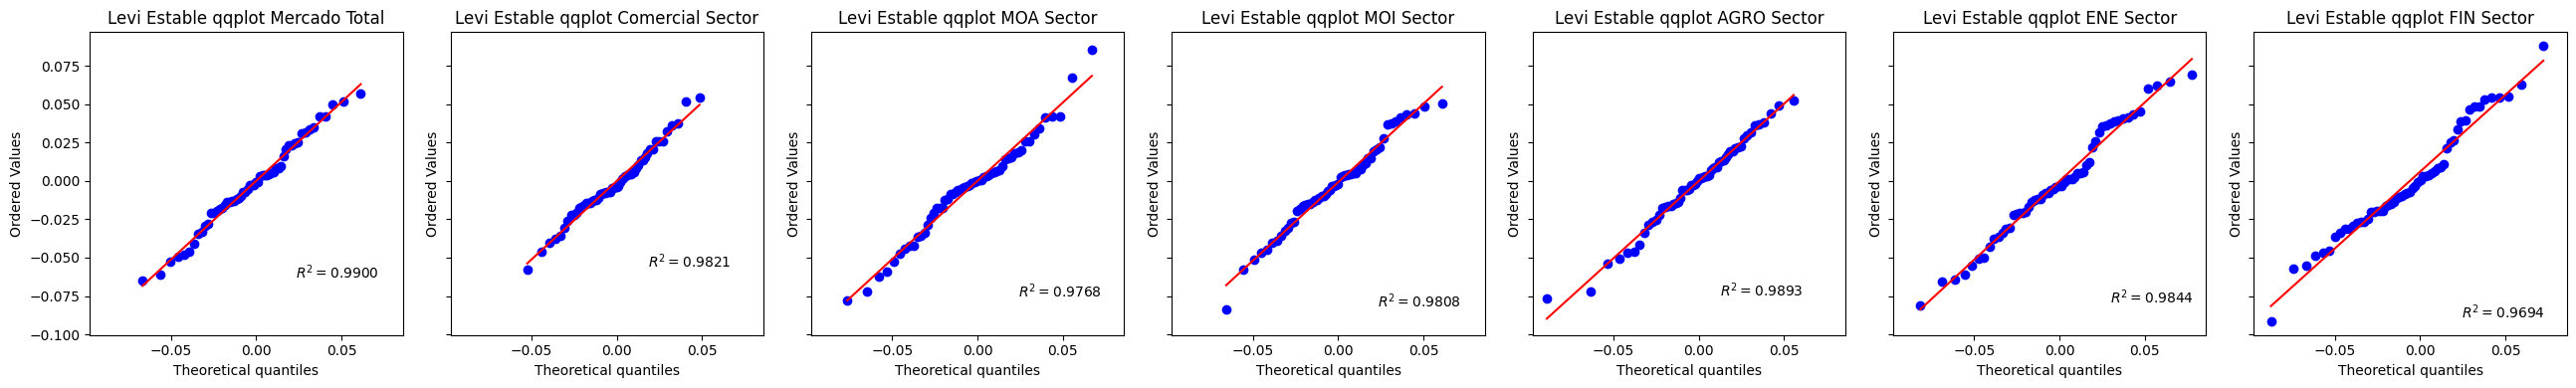

In [18]:
#QQPLOT LEVI PARA 3 MESES 
fig, axs = plt.subplots(1, 7, sharey=True, sharex=True, figsize=(10, 5))
fig.set_size_inches(26,4)


#todo
alpha, beta, loc, scale = alphat3, betat3, loct3, scalet3
stats.probplot(y24s3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[0])
axs[0].set_title(f"Levi Estable qqplot Mercado Total")


#come
alpha, beta, loc, scale = alpha_come3, beta_come3, loc_come3, scale_come3 
stats.probplot(y24scome3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[1])
axs[1].set_title(f"Levi Estable qqplot Comercial Sector")


#moa
alpha, beta, loc, scale = alphamoa3, betamoa3, locmoa3, scalemoa3
stats.probplot(y24smoa3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[2])
axs[2].set_title(f"Levi Estable qqplot MOA Sector")

#moi
alpha, beta, loc, scale = alphamoi3, betamoi3, locmoi3, scalemoi3
stats.probplot(y24smoi3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[3])
axs[3].set_title(f"Levi Estable qqplot MOI Sector" )

#agro
alpha, beta, loc, scale = alphaagro3, betaagro3, locagro3, scaleagro3
stats.probplot(y24sagro3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[4])
axs[4].set_title(f"Levi Estable qqplot AGRO Sector")

#ene
alpha, beta, loc, scale = alphaene3, betaene3, locene3, scaleene3
stats.probplot(y24sene3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[5])
axs[5].set_title(f"Levi Estable qqplot ENE Sector")


#FIN
alpha, beta, loc, scale = alphafin3, betafin3, locfin3, scalefin3
stats.probplot(y24sfin3,dist='levy_stable', sparams=(alpha, beta, loc, scale),rvalue=True, plot=axs[6])
axs[6].set_title(f"Levi Estable qqplot FIN Sector")



plt.tight_layout()

plt.show()

In [19]:
#  BONDAD AJUSTE para 12 meses NORMAL

nloc_come, nscale_come = stats.norm.fit(y24scome)
ktestcom_n = stats.ks_1samp(x=y24scome, cdf=stats.norm.cdf, args=(nloc_come, nscale_come ))

nloc_moa, nscale_moa = stats.norm.fit(y24smoa)
ktestmoa_n = stats.ks_1samp(x=y24smoa, cdf=stats.norm.cdf, args=(nloc_moa, nscale_moa))

nloc_moi, nscale_moi = stats.norm.fit(y24smoi)
ktestmoi_n = stats.ks_1samp(x=y24smoi, cdf=stats.norm.cdf, args=(nloc_moi, nscale_moi))

nloc_agro, nscale_agro = stats.norm.fit(y24sagro)
ktestagro_n = stats.ks_1samp(x=y24smoi, cdf=stats.norm.cdf, args=(nloc_moi, nscale_moi))

nloc_ene, nscale_ene = stats.norm.fit(y24sene)
ktestene_n = stats.ks_1samp(x=y24sene, cdf=stats.norm.cdf, args=(nloc_ene, nscale_ene))

nloc_fin, nscale_fin = stats.norm.fit(y24sfin)
ktestfin_n = stats.ks_1samp(x=y24sfin, cdf=stats.norm.cdf, args=(nloc_fin, nscale_fin))

nloc_t, nscale_t = stats.norm.fit(y24s)
ktesttot_n = stats.ks_1samp(x=y24s, cdf=stats.norm.cdf, args=(nloc_t, nscale_t))


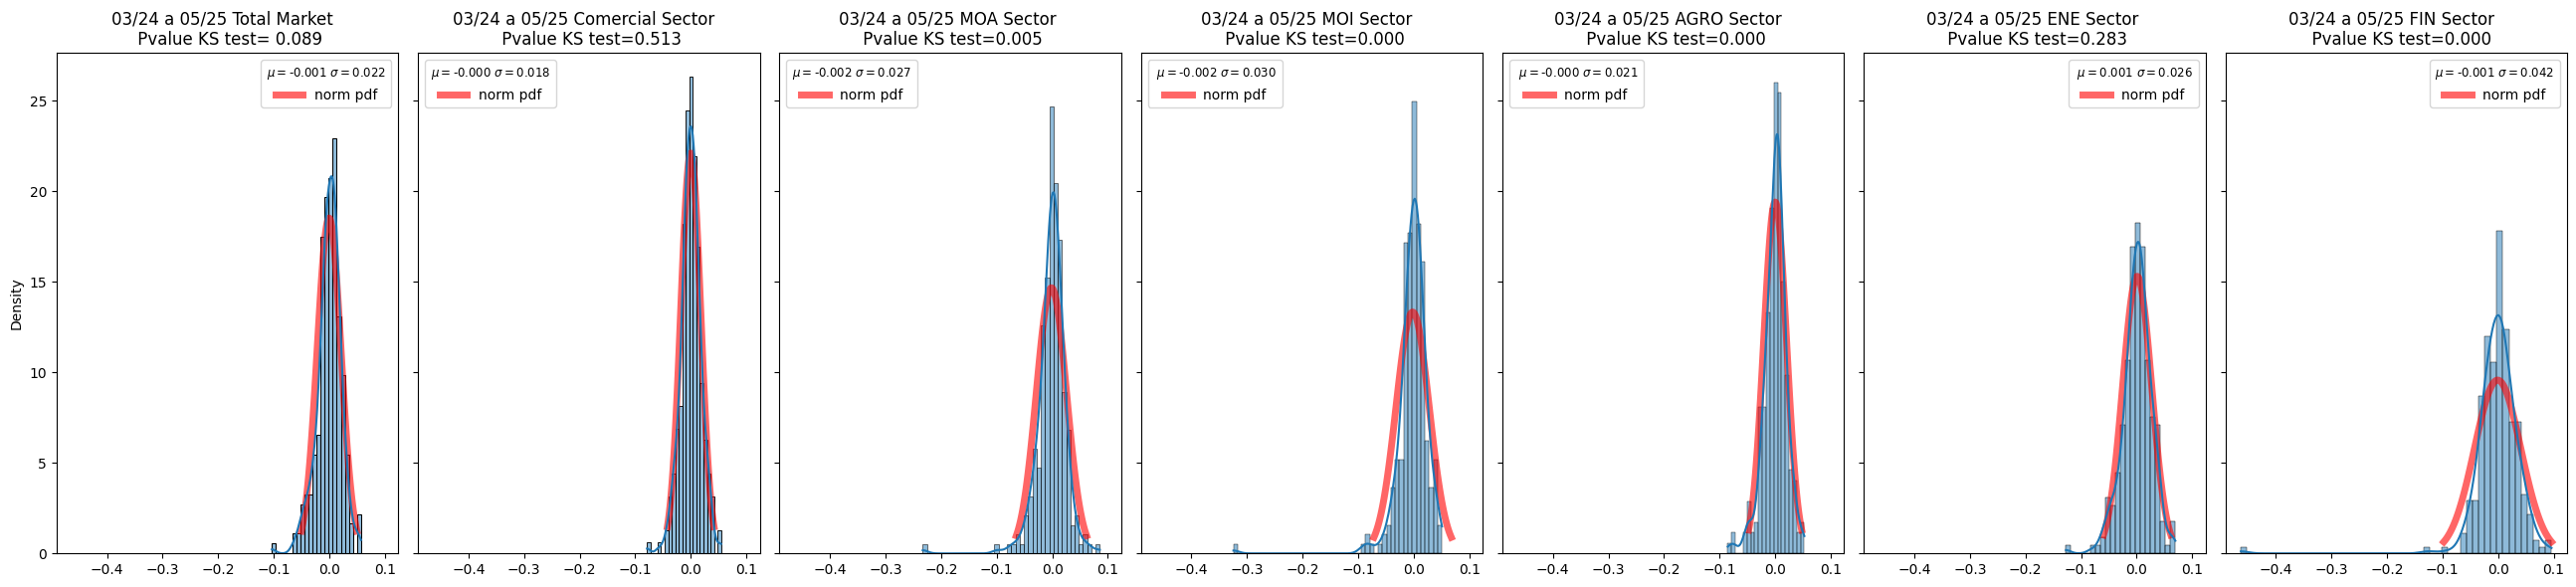

In [20]:
#  HISTOGRAMA para 12 meses NORMAL

fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(26, 6)
#todo
loc, scale = nloc_t, nscale_t
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[0].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[0],data=y24s,stat = "density",kde=True)
ax[0].set_title(f"03/24 a 05/25 Total Market  \n Pvalue KS test= {ktesttot_n.pvalue:.3f}")
ax[0].legend(title=fr"$\mu=${nloc_t:.3f} $\sigma=${nscale_t:.3f}", title_fontsize = "8.5")

#come
loc, scale = nloc_come, nscale_come 
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99,  loc, scale), 100)
ax[1].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[1],data=y24scome, stat = "density",kde=True)
ax[1].set_title(f"03/24 a 05/25 Comercial Sector  \n Pvalue KS test={ktestcom_n.pvalue:.3f}")
ax[1].legend(title=fr"$\mu=${nloc_come:.3f} $\sigma=${nscale_come :.3f}", title_fontsize = "8.5")

#moa
loc, scale =  nloc_moa, nscale_moa
x = np.linspace(stats.norm.ppf(0.01,loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[2].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[2],data=y24smoa, stat = "density",kde=True)
ax[2].set_title(f"03/24 a 05/25 MOA Sector \n Pvalue KS test={ktestmoa_n.pvalue:.3f}")
ax[2].legend(title=fr"$\mu=${nloc_moa:.3f} $\sigma=${nscale_moa:.3f}", title_fontsize = "8.5")

#moi
loc, scale = nloc_moi, nscale_moi 
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99,  loc, scale), 100)
ax[3].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[3],data=y24smoi, stat = "density",kde=True)
ax[3].set_title(f"03/24 a 05/25 MOI Sector  \n Pvalue KS test={ktestmoi_n.pvalue:.3f}" )
ax[3].legend(title=fr" $\mu=${nloc_moi:.3f} $\sigma=${nscale_moi:.3f}", title_fontsize = "8.5")

#agro
loc, scale = nloc_agro, nscale_agro
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[4].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[4],data=y24sagro, stat = "density",kde=True)
ax[4].set_title(f"03/24 a 05/25 AGRO Sector  \n Pvalue KS test={ktestagro_n.pvalue:.3f}")
ax[4].legend(title=fr" $\mu=${nloc_agro:.3f} $\sigma=${nscale_agro:.3f}", title_fontsize = "8.5")

#ene
loc, scale = nloc_ene, nscale_ene
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[5].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[5],data=y24sene, stat = "density",kde=True)
ax[5].set_title(f"03/24 a 05/25 ENE Sector \n Pvalue KS test={ktestene_n.pvalue:.3f}")
ax[5].legend(title=fr" $\mu=${nloc_ene:.3f} $\sigma=${nscale_ene:.3f}", title_fontsize = "8.5")

#FIN
loc, scale = nloc_fin, nscale_fin 
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[6].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[6],data=y24sfin, stat = "density",kde=True)
ax[6].set_title(f"03/24 a 05/25 FIN Sector  \n  Pvalue KS test={ktestfin_n.pvalue:.3f}")
ax[6].legend(title=fr"$\mu=${nloc_fin:.3f} $\sigma=${nscale_fin:.3f}", title_fontsize = "8.5")



fig.tight_layout()


# blue line is empirical data and red line is teorical data of the goodness fit

In [21]:
#  BONDAD AJUSTE para 9 meses NORMAL

nloc_come9, nscale_come9 = stats.norm.fit(y24scome9)
ktestcom_n9 = stats.ks_1samp(x=y24scome9, cdf=stats.norm.cdf, args=(nloc_come9, nscale_come9 ))

nloc_moa9, nscale_moa9 = stats.norm.fit(y24smoa9)
ktestmoa_n9 = stats.ks_1samp(x=y24smoa9, cdf=stats.norm.cdf, args=(nloc_moa9, nscale_moa9))

nloc_moi9, nscale_moi9 = stats.norm.fit(y24smoi9)
ktestmoi_n9 = stats.ks_1samp(x=y24smoi9, cdf=stats.norm.cdf, args=(nloc_moi9, nscale_moi9))

nloc_agro9, nscale_agro9 = stats.norm.fit(y24sagro9)
ktestagro_n9 = stats.ks_1samp(x=y24smoi9, cdf=stats.norm.cdf, args=(nloc_moi9, nscale_moi9))

nloc_ene9, nscale_ene9 = stats.norm.fit(y24sene9)
ktestene_n9 = stats.ks_1samp(x=y24sene9, cdf=stats.norm.cdf, args=(nloc_ene9, nscale_ene9))

nloc_fin9, nscale_fin9 = stats.norm.fit(y24sfin9)
ktestfin_n9 = stats.ks_1samp(x=y24sfin9, cdf=stats.norm.cdf, args=(nloc_fin9, nscale_fin9))

nloc_t9, nscale_t9 = stats.norm.fit(y24s9)
ktesttot_n9 = stats.ks_1samp(x=y24s9, cdf=stats.norm.cdf, args=(nloc_t9, nscale_t9))

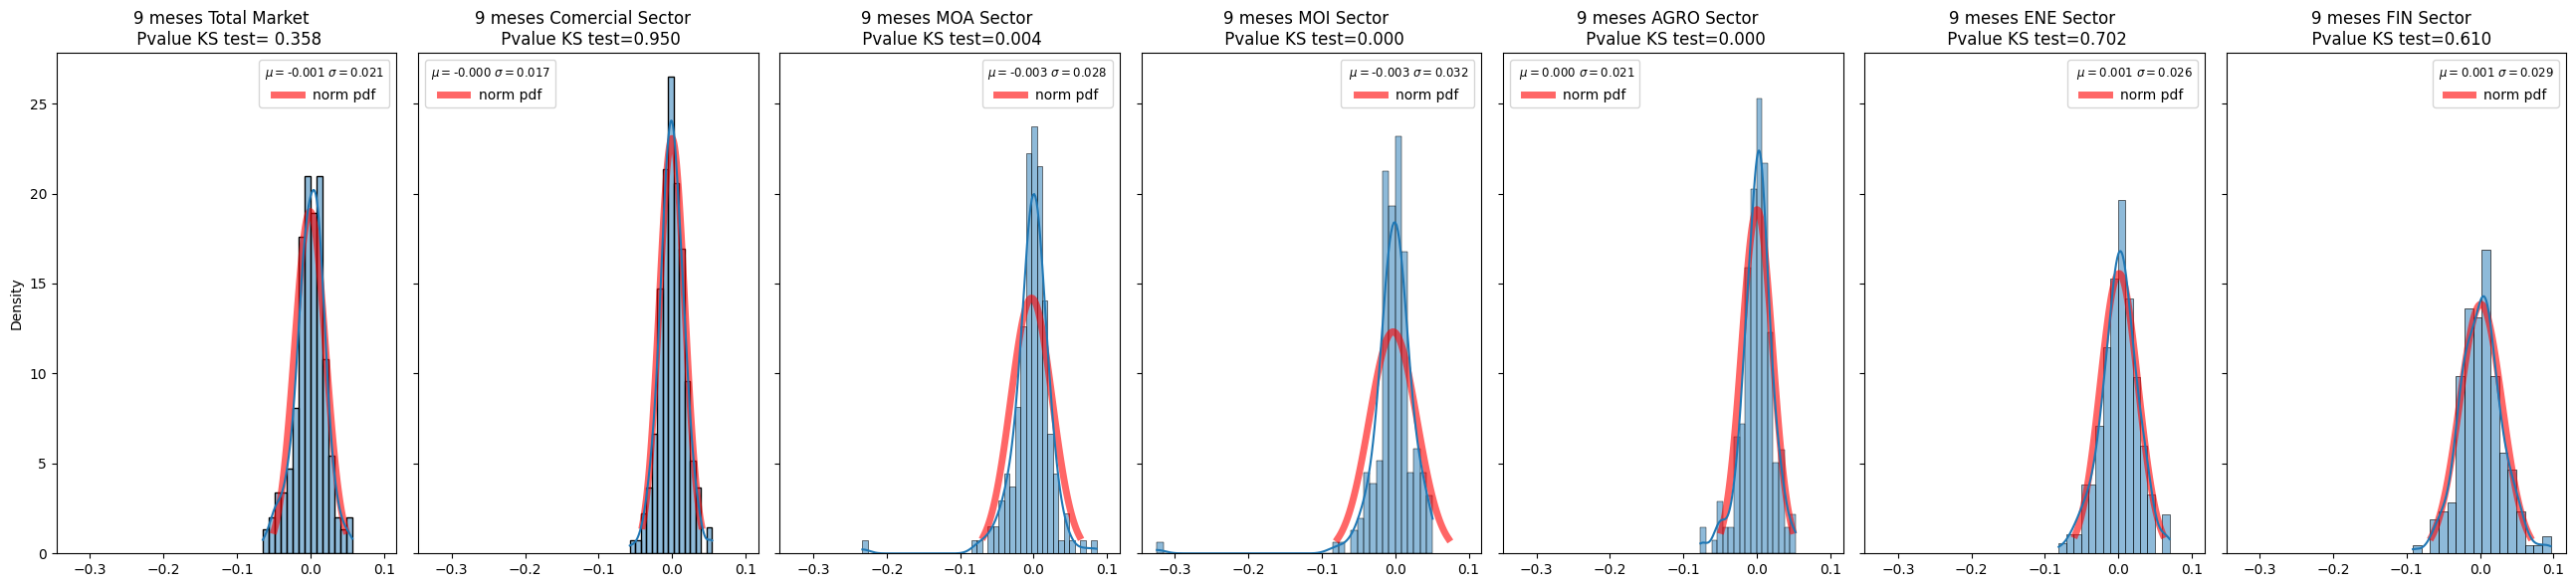

In [22]:
#  HISTOGRAMA para 9 meses NORMAL

fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(26, 6)
#todo
loc, scale = nloc_t9, nscale_t9
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[0].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[0],data=y24s9,stat = "density",kde=True)
ax[0].set_title(f"9 meses Total Market  \n Pvalue KS test= {ktesttot_n9.pvalue:.3f}")
ax[0].legend(title=fr"$\mu=${nloc_t9:.3f} $\sigma=${nscale_t9:.3f}", title_fontsize = "8.5")

#come
loc, scale = nloc_come9, nscale_come9 
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99,  loc, scale), 100)
ax[1].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[1],data=y24scome9, stat = "density",kde=True)
ax[1].set_title(f"9 meses Comercial Sector  \n Pvalue KS test={ktestcom_n9.pvalue:.3f}")
ax[1].legend(title=fr"$\mu=${nloc_come9:.3f} $\sigma=${nscale_come9 :.3f}", title_fontsize = "8.5")

#moa
loc, scale =  nloc_moa9, nscale_moa9
x = np.linspace(stats.norm.ppf(0.01,loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[2].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[2],data=y24smoa9, stat = "density",kde=True)
ax[2].set_title(f"9 meses MOA Sector \n Pvalue KS test={ktestmoa_n9.pvalue:.3f}")
ax[2].legend(title=fr"$\mu=${nloc_moa9:.3f} $\sigma=${nscale_moa9:.3f}", title_fontsize = "8.5")

#moi
loc, scale = nloc_moi9, nscale_moi9 
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99,  loc, scale), 100)
ax[3].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[3],data=y24smoi9, stat = "density",kde=True)
ax[3].set_title(f"9 meses MOI Sector  \n Pvalue KS test={ktestmoi_n9.pvalue:.3f}" )
ax[3].legend(title=fr" $\mu=${nloc_moi9:.3f} $\sigma=${nscale_moi9:.3f}", title_fontsize = "8.5")

#agro
loc, scale = nloc_agro9, nscale_agro9
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[4].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[4],data=y24sagro9, stat = "density",kde=True)
ax[4].set_title(f"9 meses AGRO Sector  \n Pvalue KS test={ktestagro_n9.pvalue:.3f}")
ax[4].legend(title=fr" $\mu=${nloc_agro9:.3f} $\sigma=${nscale_agro9:.3f}", title_fontsize = "8.5")

#ene
loc, scale = nloc_ene9, nscale_ene9
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[5].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[5],data=y24sene9, stat = "density",kde=True)
ax[5].set_title(f"9 meses ENE Sector \n Pvalue KS test={ktestene_n9.pvalue:.3f}")
ax[5].legend(title=fr" $\mu=${nloc_ene9:.3f} $\sigma=${nscale_ene9:.3f}", title_fontsize = "8.5")

#FIN
loc, scale = nloc_fin9, nscale_fin9 
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[6].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[6],data=y24sfin9, stat = "density",kde=True)
ax[6].set_title(f"9 meses FIN Sector  \n  Pvalue KS test={ktestfin_n9.pvalue:.3f}")
ax[6].legend(title=fr"$\mu=${nloc_fin9:.3f} $\sigma=${nscale_fin9:.3f}", title_fontsize = "8.5")



fig.tight_layout()

In [23]:
#  BONDAD AJUSTE para 6 meses NORMAL

nloc_come6, nscale_come6 = stats.norm.fit(y24scome6)
ktestcom_n6 = stats.ks_1samp(x=y24scome6, cdf=stats.norm.cdf, args=(nloc_come6, nscale_come6 ))

nloc_moa6, nscale_moa6 = stats.norm.fit(y24smoa6)
ktestmoa_n6 = stats.ks_1samp(x=y24smoa6, cdf=stats.norm.cdf, args=(nloc_moa6, nscale_moa6))

nloc_moi6, nscale_moi6 = stats.norm.fit(y24smoi6)
ktestmoi_n6 = stats.ks_1samp(x=y24smoi6, cdf=stats.norm.cdf, args=(nloc_moi6, nscale_moi6))

nloc_agro6, nscale_agro6 = stats.norm.fit(y24sagro6)
ktestagro_n6 = stats.ks_1samp(x=y24smoi6, cdf=stats.norm.cdf, args=(nloc_moi6, nscale_moi6))

nloc_ene6, nscale_ene6 = stats.norm.fit(y24sene6)
ktestene_n6 = stats.ks_1samp(x=y24sene6, cdf=stats.norm.cdf, args=(nloc_ene6, nscale_ene6))

nloc_fin6, nscale_fin6 = stats.norm.fit(y24sfin6)
ktestfin_n6 = stats.ks_1samp(x=y24sfin6, cdf=stats.norm.cdf, args=(nloc_fin6, nscale_fin6))

nloc_t6, nscale_t6 = stats.norm.fit(y24s6)
ktesttot_n6 = stats.ks_1samp(x=y24s6, cdf=stats.norm.cdf, args=(nloc_t6, nscale_t6))

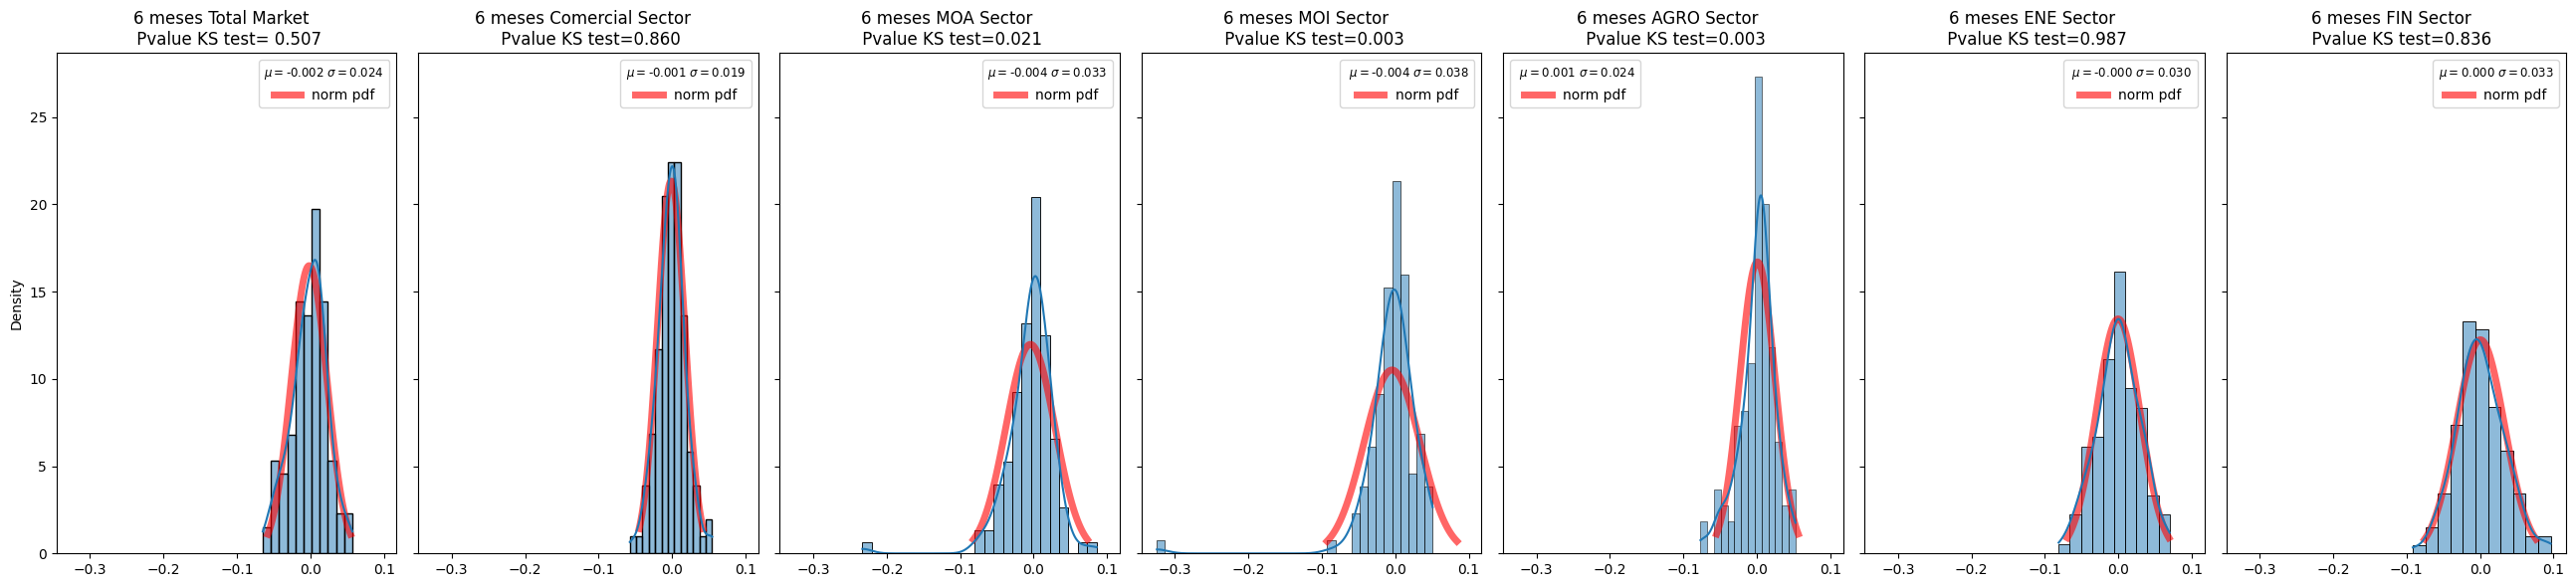

In [24]:
#  HISTOGRAMA para 6 meses NORMAL

fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(26, 6)
#todo
loc, scale = nloc_t6, nscale_t6
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[0].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[0],data=y24s6,stat = "density",kde=True)
ax[0].set_title(f"6 meses Total Market  \n Pvalue KS test= {ktesttot_n6.pvalue:.3f}")
ax[0].legend(title=fr"$\mu=${nloc_t6:.3f} $\sigma=${nscale_t6:.3f}", title_fontsize = "8.5")

#come
loc, scale = nloc_come6, nscale_come6 
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99,  loc, scale), 100)
ax[1].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[1],data=y24scome6, stat = "density",kde=True)
ax[1].set_title(f"6 meses Comercial Sector  \n Pvalue KS test={ktestcom_n6.pvalue:.3f}")
ax[1].legend(title=fr"$\mu=${nloc_come6:.3f} $\sigma=${nscale_come6 :.3f}", title_fontsize = "8.5")

#moa
loc, scale =  nloc_moa6, nscale_moa6
x = np.linspace(stats.norm.ppf(0.01,loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[2].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[2],data=y24smoa6, stat = "density",kde=True)
ax[2].set_title(f"6 meses MOA Sector \n Pvalue KS test={ktestmoa_n6.pvalue:.3f}")
ax[2].legend(title=fr"$\mu=${nloc_moa6:.3f} $\sigma=${nscale_moa6:.3f}", title_fontsize = "8.5")

#moi
loc, scale = nloc_moi6, nscale_moi6 
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99,  loc, scale), 100)
ax[3].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[3],data=y24smoi6, stat = "density",kde=True)
ax[3].set_title(f"6 meses MOI Sector  \n Pvalue KS test={ktestmoi_n6.pvalue:.3f}" )
ax[3].legend(title=fr" $\mu=${nloc_moi6:.3f} $\sigma=${nscale_moi6:.3f}", title_fontsize = "8.5")

#agro
loc, scale = nloc_agro6, nscale_agro6
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[4].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[4],data=y24sagro6, stat = "density",kde=True)
ax[4].set_title(f"6 meses AGRO Sector  \n Pvalue KS test={ktestagro_n6.pvalue:.3f}")
ax[4].legend(title=fr" $\mu=${nloc_agro6:.3f} $\sigma=${nscale_agro6:.3f}", title_fontsize = "8.5")

#ene
loc, scale = nloc_ene6, nscale_ene6
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[5].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[5],data=y24sene6, stat = "density",kde=True)
ax[5].set_title(f"6 meses ENE Sector \n Pvalue KS test={ktestene_n6.pvalue:.3f}")
ax[5].legend(title=fr" $\mu=${nloc_ene6:.3f} $\sigma=${nscale_ene6:.3f}", title_fontsize = "8.5")

#FIN
loc, scale = nloc_fin6, nscale_fin6 
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[6].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[6],data=y24sfin6, stat = "density",kde=True)
ax[6].set_title(f"6 meses FIN Sector  \n  Pvalue KS test={ktestfin_n6.pvalue:.3f}")
ax[6].legend(title=fr"$\mu=${nloc_fin6:.3f} $\sigma=${nscale_fin6:.3f}", title_fontsize = "8.5")



fig.tight_layout()

In [25]:
#  BONDAD AJUSTE para 3 meses NORMAL

nloc_come3, nscale_come3 = stats.norm.fit(y24scome3)
ktestcom_n3 = stats.ks_1samp(x=y24scome3, cdf=stats.norm.cdf, args=(nloc_come3, nscale_come3 ))

nloc_moa3, nscale_moa3 = stats.norm.fit(y24smoa3)
ktestmoa_n3 = stats.ks_1samp(x=y24smoa3, cdf=stats.norm.cdf, args=(nloc_moa3, nscale_moa3))

nloc_moi3, nscale_moi3 = stats.norm.fit(y24smoi3)
ktestmoi_n3 = stats.ks_1samp(x=y24smoi3, cdf=stats.norm.cdf, args=(nloc_moi3, nscale_moi3))

nloc_agro3, nscale_agro3 = stats.norm.fit(y24sagro3)
ktestagro_n3 = stats.ks_1samp(x=y24smoi3, cdf=stats.norm.cdf, args=(nloc_moi3, nscale_moi3))

nloc_ene3, nscale_ene3 = stats.norm.fit(y24sene3)
ktestene_n3 = stats.ks_1samp(x=y24sene3, cdf=stats.norm.cdf, args=(nloc_ene3, nscale_ene3))

nloc_fin3, nscale_fin3 = stats.norm.fit(y24sfin3)
ktestfin_n3 = stats.ks_1samp(x=y24sfin3, cdf=stats.norm.cdf, args=(nloc_fin3, nscale_fin3))

nloc_t3, nscale_t3 = stats.norm.fit(y24s3)
ktesttot_n3 = stats.ks_1samp(x=y24s3, cdf=stats.norm.cdf, args=(nloc_t3, nscale_t3))

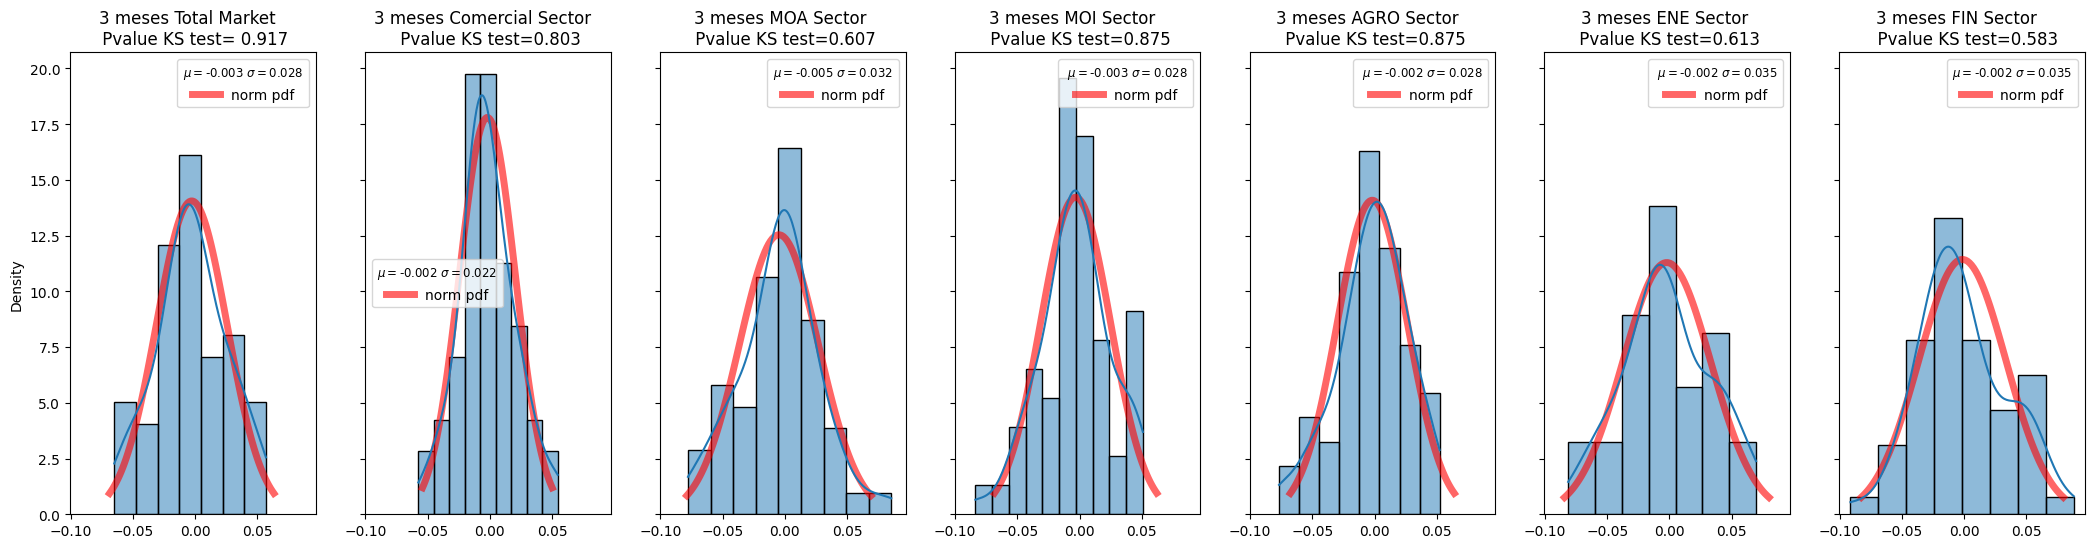

In [26]:
#  HISTOGRAMA para 3 meses NORMAL

fig, ax = plt.subplots(1, 7, sharey=True, sharex=True)
fig.set_size_inches(26, 6)
#todo
loc, scale = nloc_t3, nscale_t3
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[0].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[0],data=y24s3,stat = "density",kde=True)
ax[0].set_title(f"3 meses Total Market  \n Pvalue KS test= {ktesttot_n3.pvalue:.3f}")
ax[0].legend(title=fr"$\mu=${nloc_t3:.3f} $\sigma=${nscale_t3:.3f}", title_fontsize = "8.5")

#come
loc, scale = nloc_come3, nscale_come3 
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99,  loc, scale), 100)
ax[1].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[1],data=y24scome3, stat = "density",kde=True)
ax[1].set_title(f"3 meses Comercial Sector  \n Pvalue KS test={ktestcom_n3.pvalue:.3f}")
ax[1].legend(title=fr"$\mu=${nloc_come3:.3f} $\sigma=${nscale_come3 :.3f}", title_fontsize = "8.5")

#moa
loc, scale =  nloc_moa3, nscale_moa3
x = np.linspace(stats.norm.ppf(0.01,loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[2].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[2],data=y24smoa3, stat = "density",kde=True)
ax[2].set_title(f"3 meses MOA Sector \n Pvalue KS test={ktestmoa_n3.pvalue:.3f}")
ax[2].legend(title=fr"$\mu=${nloc_moa3:.3f} $\sigma=${nscale_moa3:.3f}", title_fontsize = "8.5")

#moi
loc, scale = nloc_moi3, nscale_moi3 
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99,  loc, scale), 100)
ax[3].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[3],data=y24smoi3, stat = "density",kde=True)
ax[3].set_title(f"3 meses MOI Sector  \n Pvalue KS test={ktestmoi_n3.pvalue:.3f}" )
ax[3].legend(title=fr" $\mu=${nloc_moi3:.3f} $\sigma=${nscale_moi3:.3f}", title_fontsize = "8.5")

#agro
loc, scale = nloc_agro3, nscale_agro3
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[4].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[4],data=y24sagro3, stat = "density",kde=True)
ax[4].set_title(f"3 meses AGRO Sector  \n Pvalue KS test={ktestagro_n3.pvalue:.3f}")
ax[4].legend(title=fr" $\mu=${nloc_agro3:.3f} $\sigma=${nscale_agro3:.3f}", title_fontsize = "8.5")

#ene
loc, scale = nloc_ene3, nscale_ene3
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[5].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[5],data=y24sene3, stat = "density",kde=True)
ax[5].set_title(f"3 meses ENE Sector \n Pvalue KS test={ktestene_n3.pvalue:.3f}")
ax[5].legend(title=fr" $\mu=${nloc_ene3:.3f} $\sigma=${nscale_ene3:.3f}", title_fontsize = "8.5")

#FIN
loc, scale = nloc_fin3, nscale_fin3 
x = np.linspace(stats.norm.ppf(0.01, loc, scale),
                stats.norm.ppf(0.99, loc, scale), 100)
ax[6].plot(x, stats.norm.pdf(x, loc,scale),'r-', lw=5, alpha=0.6, label='norm pdf')
sns.histplot(ax=ax[6],data=y24sfin3, stat = "density",kde=True)
ax[6].set_title(f"3 meses FIN Sector  \n  Pvalue KS test={ktestfin_n3.pvalue:.3f}")
ax[6].legend(title=fr"$\mu=${nloc_fin3:.3f} $\sigma=${nscale_fin3:.3f}", title_fontsize = "8.5")





In [27]:
gp.optimize?

Type:        module
String form: <module 'garpar.optimize' from '/home/nadia/carteras/lib/python3.10/site-packages/garpar/optimize/__init__.py'>
File:        ~/carteras/lib/python3.10/site-packages/garpar/optimize/__init__.py
Docstring:  
Optimize subpackage of Garpar project.

This subpackage offers foundational classes for developing mean-variance
optimization models tailored for StocksSets, featuring various implementations
leveraging PyPortfolioOpt.

Key Features:
    - Portfolio optimization
    - Mean-variance models
    - Markowitz model

See Also
--------
    PyPortfolioOpt: https://pyportfolioopt.readthedocs.io/

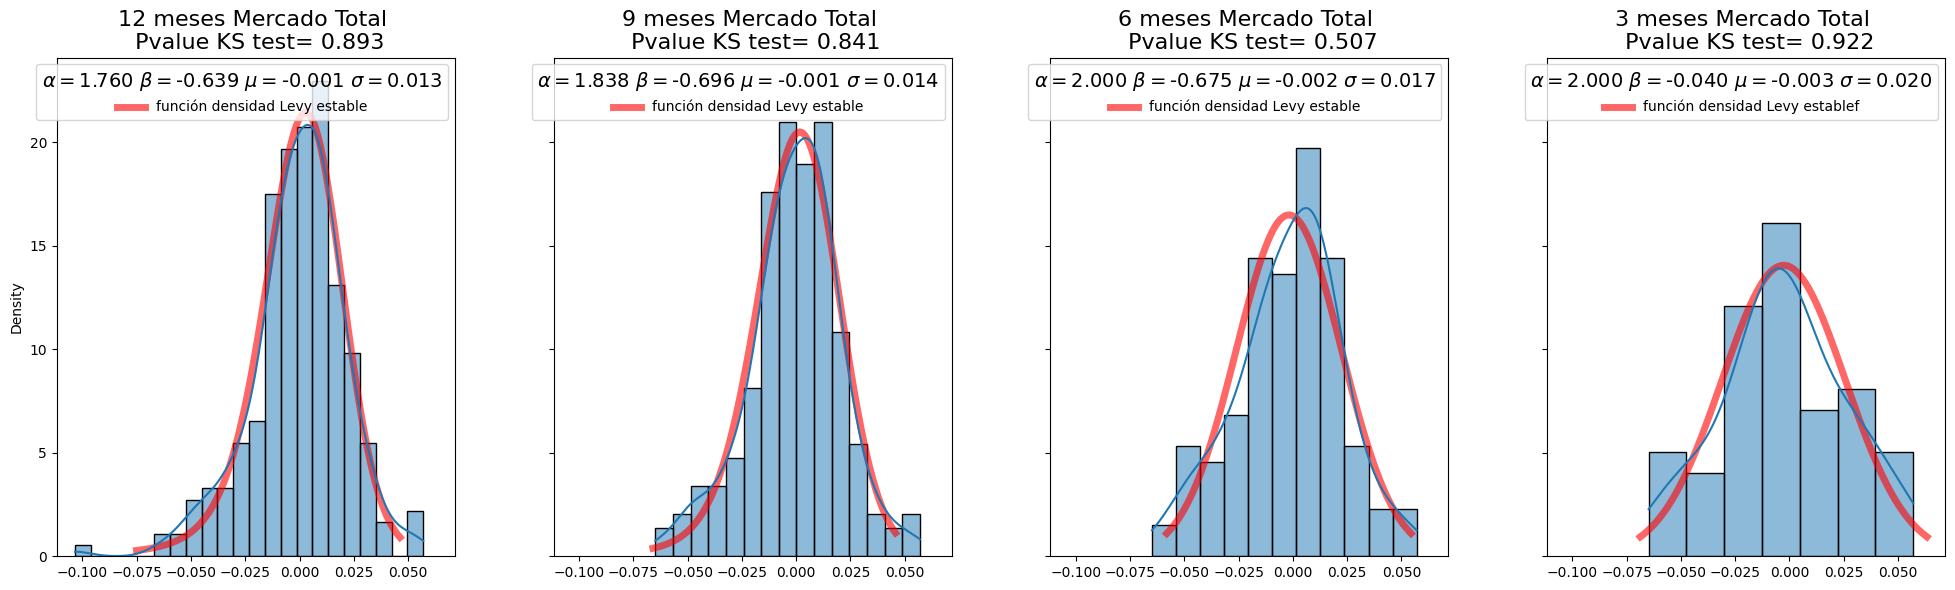

In [28]:

fig, ax = plt.subplots(1, 4, sharey=True, sharex=True)
fig.set_size_inches(20, 6)

#todo 12 meses hist
alpha, beta, loc, scale = alphat, betat, loct, scalet
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[0],data=y24s,stat = "density",kde=True)
ax[0].set_title(f"12 meses Mercado Total \n Pvalue KS test= {ktestt.pvalue:.3f}", fontsize=16)
ax[0].legend(title=fr"$\alpha=${alphat:.3f} $\beta=${betat:.3f} $\mu=${loct:.3f} $\sigma=${scalet:.3f}", title_fontsize = "14")

#todo 9 meses hist
alpha, beta, loc, scale = alphat9, betat9, loct9, scalet9
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[1],data=y24s9,stat = "density",kde=True)
ax[1].set_title(f"9 meses Mercado Total \n Pvalue KS test= {ktestt9.pvalue:.3f}", fontsize=16)
ax[1].legend(title=fr"$\alpha=${alphat9:.3f} $\beta=${betat9:.3f} $\mu=${loct9:.3f} $\sigma=${scalet9:.3f}", title_fontsize = "14")

#todo 6 meses hist
alpha, beta, loc, scale = alphat6, betat6, loct6, scalet6
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[2].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy estable')
sns.histplot(ax=ax[2],data=y24s6,stat = "density",kde=True)
ax[2].set_title(f"6 meses Mercado Total \n Pvalue KS test= {ktestt6.pvalue:.3f}", fontsize=16)
ax[2].legend(title=fr"$\alpha=${alphat6:.3f} $\beta=${betat6:.3f} $\mu=${loct6:.3f} $\sigma=${scalet6:.3f}", title_fontsize = "14")

#todo 3 meses histograma
alpha, beta, loc, scale = alphat3, betat3, loct3, scalet3
x = np.linspace(stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[3].plot(x, stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='función densidad Levy establef')
sns.histplot(ax=ax[3],data=y24s3,stat = "density",kde=True)
ax[3].set_title(f"3 meses Mercado Total \n Pvalue KS test= {ktestt3.pvalue:.3f}", fontsize=16)
ax[3].legend(title=fr"$\alpha=${alphat3:.3f} $\beta=${betat3:.3f} $\mu=${loct3:.3f} $\sigma=${scalet3:.3f}", title_fontsize = "14")




plt.tight_layout()

plt.show()


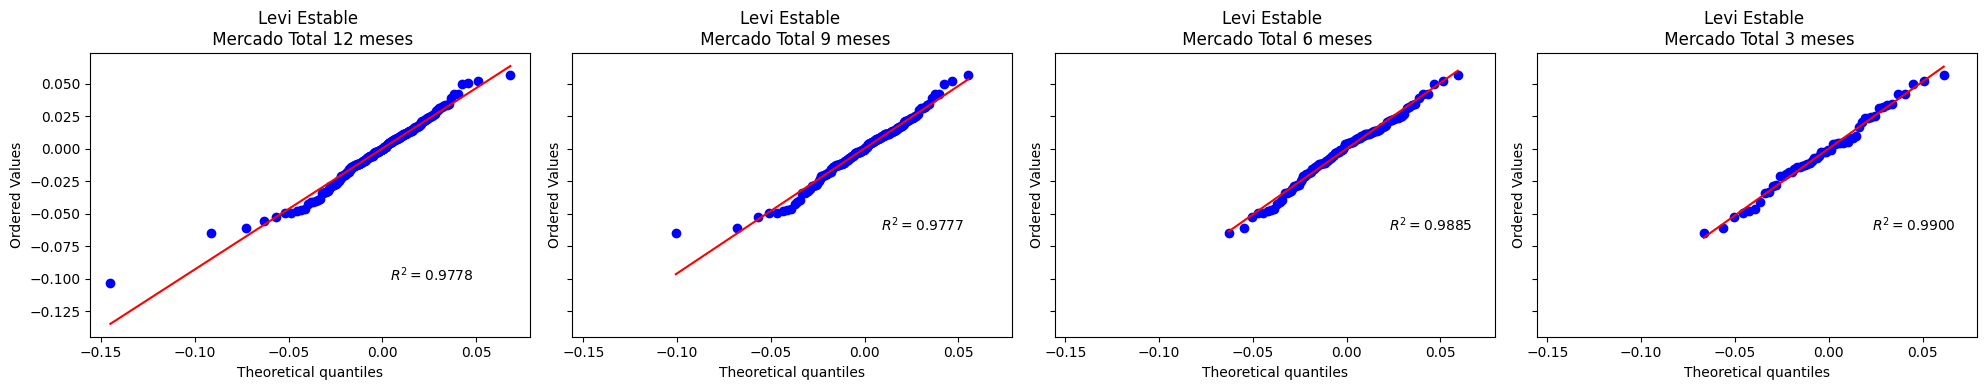

In [29]:
fig, axs = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(10, 5))
fig.set_size_inches(20,4)


#todo 12 mestes qqplot
alpha, beta, loc, scale = alphat, betat, loct, scalet
stats.probplot(y24s,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[0])
axs[0].set_title(f"Levi Estable \n Mercado Total 12 meses")

#todo 9 meses qqplot
alpha, beta, loc, scale = alphat9, betat9, loct9, scalet9
stats.probplot(y24s9,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[1])
axs[1].set_title(f"Levi Estable \n Mercado Total 9 meses")



#todo 6 meses qqplot
alpha, beta, loc, scale = alphat6, betat6, loct6, scalet6
stats.probplot(y24s6,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[2])
axs[2].set_title(f"Levi Estable \n Mercado Total 6 meses")


#todo 3 meses qq plot
alpha, beta, loc, scale = alphat3, betat3, loct3, scalet3
stats.probplot(y24s3,dist='levy_stable', sparams=(alpha, beta, loc, scale), rvalue=True, plot=axs[3])
axs[3].set_title(f"Levi Estable \n Mercado Total 3 meses")

plt.tight_layout()

plt.show()